In [1]:
from src import toggle_cell_code as tcc
#from src import librarys
from itertools import combinations
from math import factorial
from os import scandir, getcwd
import re
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.ticker import FixedLocator, MaxNLocator

# Limpieza de los datos

Tenemos dos debilidades en nuestra simulacion, la primera es sistemativa y la otra humana. Por la carencia de poder de computo, corri una parte de los datos en una pc virtual el cual me mermitia un tiempo limitado de computo continuo, lo que me obligo a hacer corridas con menos rondas de juegos para fragmentar las 1000 rondas hasta en 10 partes, para las veces que se ganaba con 3 cartones llenos o el numero de cartones aumentaba.El segundo error fue no anexar la cantidad de cartones necesarios para ganar, por esta razon vamos a extraer la informacion de nuestro conjunto de datos y aprovechamos para cambiar las etiquetas de las columnas para mejor compresión.

El primer error lo solucionamos con el siguente código que solo se ejecuta una vez para cada conjunto de datos, 
```python
# Solo una ves para concatenar todos los data frame

def ls(ruta = getcwd()):
    return [arch.name for arch in scandir(ruta) if arch.is_file()]

def dfConcat(entrada,fileout):
    list_file = ls(entrada)
    df_loteria = pd.DataFrame(columns = ["numTablas", "numFichas", "distFichas", "fichasToWin","tabToWin"])
    
    for file in list_file:
        temp_df_loteria = pd.read_csv(entrada+file)
        df_loteria = pd.concat([df_loteria,temp_df_loteria],ignore_index=True)
    
    
    df_loteria.to_csv(entrada+fileout, header = True, index = False)

# Para invocar la funcion anterior y cont 
entrada = 'temp/tab&fichas/listas/'# dataframe cuando cambiamos el número de fichas
fileout = 'df_loteria_ntaps&fichas.csv'

dfConcat(entrada,fileout)
```
En resumen, busca todos los archivos en la carpeta de entrada, concatena todos los archivos y los almacena en un archivo de salida que nosotros ingresamos en la variable fileout.

```python
def numTabs(tabs): # Contador de cartones
    tab2win=[]
    for tab in tabs:
        tab2win.append(len(tab))
    return tab2win

def reorder_tabs(dataFrame):           # Convierte los str de tabToWin en un arreglo 
    nDF = dataFrame["tabToWin"].copy() # los cuenta y anexa toda la informacion.
    df = dataFrame.copy()
    df_out = []
    
    for tab in nDF:
        array = []

        int_b = re.findall("(\d+)",tab)

        for i in range(int(len(int_b)/8)):
            temp_array = []

            for i in range(i*8,i*8+8):
                temp_array.append(int(int_b[i]))

            array.append(temp_array)
        
        df_out.append(array)
    
    tab2win = numTabs(df_out)
    
    df["tab2win"] = pd.Series(tab2win)
    df["tabs"]=pd.Series(df_out)
    df.pop("tabToWin")
      
    return df


# Invocamos la funcion
```
 Este segundo insciso busca entre los datos la columna `tabToWin`y los analiza para contar el número de cartones almacenados, para luego anexar el resultado a una nueva columna `tab2win` y por ultimo le cambia el nombre a la columna analizada a `tabs`. Esto solo se hará una vez por cada vez que completemos la simulacion de cada cojunto de datos.

## Representacion gráfica de los datos

Antes de hablar de los resultados, me gustaria destacar que hacer las simulaciones por separado no cambia el contexto en donde se reproducen las rondas, la interprestacion solo va a ser difertene para los datos del primer conjunto de datos, por usar la configuracion `"unico"`, se puede interpretar que nuestro carton jugó con miles de cartones diferentes, esto es así porque queria tener un estimado como cambiaban mis probabilidades de ganar con el incremento del numero de cartones o de fichas. Esto no se ve en el ultimo conjunto de datos porque mi interes con el **tercer** conjunto de datos es constrastar una distribucion uniforme con otra ditribucion de fichas y mi motivacion con esa parte del analisis es constrastar las posibilidades de ganar en estos dos contexto. En el mundo físico, complicado garantizar esta distribucion uniforme de escogencia en las fichas del sorteo.

Otro factor a considerar es que nuestro chance de ganar va estar mas sujeto al numero de personas que juegan, aunque es posible estimar la probabilidad de ganar de un carton, competir con otros disminuye nuestro chance de ganar. Pero el numero de fichas va a ser determinante para saber, cuantos estan jugando, que cartones podrian estar jundo en caso de tener preferencia de seleccion en algunas fichas. 

**Aqui   Incluir los datos a visualizar cuando tengamos todo listo**

Proseguiremos a la apertura de nuestros datos concatenados y los prosecaremos con `reorder_tabs( Dataframe ) `. 

In [8]:
tcc.toggle_cell_code('proceso')

def numTabs(tabs): # Contador de cartones
    tab2win=[]
    for tab in tabs:
        tab2win.append(len(tab))
    return tab2win

def reorder_tabs(dataFrame):           # Convierte los str de tabToWin en un arreglo 
    nDF = dataFrame["tabToWin"].copy() # los cuenta y anexa toda la informacion.
    df = dataFrame.copy()
    df_out = []
    
    for tab in nDF:
        array = []

        int_b = re.findall("(\d+)",tab)

        for i in range(int(len(int_b)/8)):
            temp_array = []

            for i in range(i*8,i*8+8):
                temp_array.append(int(int_b[i]))

            array.append(temp_array)
        
        df_out.append(array)
    
    tab2win = numTabs(df_out)
    
    df["tab2win"] = pd.Series(tab2win)
    df["tabs"]=pd.Series(df_out)
    df.pop("tabToWin")
      
    return df

Codigo

In [9]:
#importo los csv en bruto (reorder_tabs + numTabs)

# 1era tanda de datos
df_loteria = pd.read_csv("data/df_loteria_ntaps&fichas.csv")# Cambiando num Fichas

# 2da tanda de datos
df_loteria1 = pd.read_csv("data/df_loteria_ntaps&fichas-1card.csv")# Varios cartones 1carton llen
df_loteria2 = pd.read_csv("data/df_loteria_ntaps&fichas-2card.csv")# Varios cartones 2carton llen
df_loteria3 = pd.read_csv("data/df_loteria_ntaps&fichas-3card.csv")# Varios cartones 3carton llen

#display(df_loteria.T,df_loteria1.T,df_loteria2.T,df_loteria3.T)# Muestra datos brutos

## 3era tanda de datos : 100 cartones 80 fichas 1,2 y 3 cartones llenos para ganar

df_100_80_1tab = pd.read_csv("data/df_loteria_100tabs_80fichas-1card.csv")# 1 tab lleno
df_100_80_2tab = pd.read_csv("data/df_loteria_100tabs_80fichas-2card.csv")# 2 tab lleno
df_100_80_3tab = pd.read_csv("data/df_loteria_100tabs_80fichas-3card.csv")# 3 tab lleno

df_100_80_1tab_NU = pd.read_csv("data/df_loteria_100tabs_80fichas-1card_NU.csv")# 1 tab lleno
df_100_80_2tab_NU = pd.read_csv("data/df_loteria_100tabs_80fichas-2card_NU.csv")# 2 tab lleno
df_100_80_3tab_NU = pd.read_csv("data/df_loteria_100tabs-80fichas_3cart_NU.csv")# 3 tab lleno
#display(df_100_80_1tab.T,df_100_80_2tab.T,df_100_80_3tab.T)

#display(df_loteria.T,df_loteria1.T,df_loteria2.T,df_loteria3.T)# Muestra datos brutos

#Proceso la 1era tanda de datos
df_loto   =reorder_tabs( df_loteria  )

# Poreceso la 2da tanda de datos
df_loto1  =reorder_tabs( df_loteria1 ) 
df_loto2  =reorder_tabs( df_loteria2 )
df_loto3  =reorder_tabs( df_loteria3 )

# Proceso la 3ra tanda de datos
#df_1o80_lt1_NU = reorder_tabs( df_100_80_1tab_NU[0:1000] )
#df_1o80_lt2_NU = reorder_tabs( df_100_80_2tab_NU[0:1000] )
#df_1o80_lt3_NU = reorder_tabs( df_100_80_3tab_NU[0:1000] )

df_1o80_lt1 = reorder_tabs( df_100_80_1tab )
df_1o80_lt2 = reorder_tabs( df_100_80_2tab )
df_1o80_lt3 = reorder_tabs( df_100_80_3tab )

df_1o80_lt1_NU = reorder_tabs( df_100_80_1tab_NU )
df_1o80_lt2_NU = reorder_tabs( df_100_80_2tab_NU )
df_1o80_lt3_NU = reorder_tabs( df_100_80_3tab_NU )

# Concatenamos 1 2 y 3 de ambos
df_loto123 = pd.concat([df_loto1,df_loto2,df_loto3])

df_1o80_123 = pd.concat([df_1o80_lt1,df_1o80_lt2,df_1o80_lt3],ignore_index=True)

# muestro los datos
     
display(df_loto1.T,df_loto2.T,df_loto3.T,df_loto.T)# 1era y 2da Tanda de datos

display(df_1o80_lt1.T,df_1o80_lt2.T,df_1o80_lt3.T)# 3era tanda de datos
display(df_loto123.T,df_1o80_123.T)


0     \
numTablas                                    10   
numFichas                                    80   
distFichas                              uniform   
fichasToWin                                  47   
tab2win                                       1   
tabs         [[34, 68, 51, 54, 53, 42, 37, 26]]   

                                          1     \
numTablas                                   10   
numFichas                                   80   
distFichas                             uniform   
fichasToWin                                 51   
tab2win                                      1   
tabs         [[14, 51, 44, 9, 64, 60, 31, 41]]   

                                          2     \
numTablas                                   10   
numFichas                                   80   
distFichas                             uniform   
fichasToWin                                 42   
tab2win                                      1   
tabs         [[58, 51, 74, 4, 70, 17, 43, 52]]   

                                         3     \
numTablas                                  10   
numFichas                                  80   
distFichas                            uniform   
fichasToWin                                46   
tab2win                                     1   
tabs         [[20, 27, 32, 2, 73, 3, 79, 12]]   

                                         4     \
numTablas                                  10   
numFichas                                  80   
distFichas                            uniform   
fichasToWin                                44   
tab2win                                     1   
tabs         [[9, 49, 67, 19, 50, 79, 65, 5]]   

                                         5     \
numTablas                                  10   
numFichas                                  80   
distFichas                            uniform   
fichasToWin                                41   
tab2win                                     1   
tabs         [[76, 4, 2, 43, 11, 64, 31, 23]]   

                                           6     \
numTablas                                    10   
numFichas                                    80   
distFichas                              uniform   
fichasToWin                                  37   
tab2win                                       1   
tabs         [[30, 47, 26, 53, 19, 20, 74, 46]]   

                                         7     \
numTablas                                  10   
numFichas                                  80   
distFichas                            uniform   
fichasToWin                                50   
tab2win                                     1   
tabs         [[6, 9, 77, 13, 37, 39, 61, 31]]   

                                         8     \
numTablas                                  10   
numFichas                                  80   
distFichas                            uniform   
fichasToWin                                52   
tab2win                                     1   
tabs         [[12, 76, 35, 4, 26, 60, 9, 38]]   

                                        9     ...  \
numTablas                                 10  ...   
numFichas                                 80  ...   
distFichas                           uniform  ...   
fichasToWin                               43  ...   
tab2win                                    1  ...   
tabs         [[77, 4, 29, 22, 2, 65, 7, 55]]  ...   

                                          5990  \
numTablas                                    5   
numFichas                                   80   
distFichas                             uniform   
fichasToWin                                 52   
tab2win                                      1   
tabs         [[74, 73, 17, 29, 14, 60, 16, 4]]   

                                          5991  \
numTablas                                    5   
numFichas                                   80   
distFichas                      

0     \
numTablas                                                    5   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 65   
tab2win                                                      2   
tabs         [[72, 79, 74, 28, 26, 34, 68, 50], [71, 69, 23...   

                                                          1     \
numTablas                                                    5   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 62   
tab2win                                                      2   
tabs         [[58, 15, 16, 66, 60, 69, 62, 64], [12, 70, 43...   

                                                          2     \
numTablas                                                    5   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 61   
tab2win                                                      2   
tabs         [[57, 19, 9, 8, 49, 71, 75, 73], [51, 77, 29, ...   

                                                          3     \
numTablas                                                    5   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 62   
tab2win                                                      2   
tabs         [[70, 54, 43, 29, 30, 13, 33, 14], [41, 52, 8,...   

                                                          4     \
numTablas                                                    5   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 62   
tab2win                                                      2   
tabs         [[15, 66, 62, 26, 57, 74, 9, 37], [34, 13, 5, ...   

                                                          5     \
numTablas                                                    5   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 54   
tab2win                                                      2   
tabs         [[19, 59, 45, 46, 1, 53, 15, 54], [56, 2, 23, ...   

                                                          6     \
numTablas                                                    5   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 65   
tab2win                                                      2   
tabs         [[14, 46, 73, 6, 67, 47, 32, 22], [12, 63, 38,...   

                                                          7     \
numTablas                                                    5   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 58   
tab2win                                                      2   
tabs         [[10, 41, 26, 43, 25, 53, 31, 20], [33, 4, 38,...   

                                                          8     \
numTablas                                                    5   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 56   
tab2win                 

0     \
numTablas                                                   20   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 67   
tab2win                                                      3   
tabs         [[52, 19, 37, 9, 73, 64, 66, 32], [33, 60, 57,...   

                                                          1     \
numTablas                                                   20   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 65   
tab2win                                                      3   
tabs         [[67, 70, 32, 77, 57, 16, 21, 65], [49, 18, 59...   

                                                          2     \
numTablas                                                   20   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 66   
tab2win                                                      3   
tabs         [[38, 22, 2, 29, 39, 47, 18, 11], [10, 55, 45,...   

                                                          3     \
numTablas                                                   20   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 60   
tab2win                                                      3   
tabs         [[22, 47, 74, 64, 32, 29, 28, 15], [71, 61, 4,...   

                                                          4     \
numTablas                                                   20   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 65   
tab2win                                                      3   
tabs         [[40, 38, 65, 67, 25, 55, 20, 8], [17, 35, 79,...   

                                                          5     \
numTablas                                                   20   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 66   
tab2win                                                      3   
tabs         [[74, 52, 51, 10, 65, 36, 41, 35], [69, 19, 7,...   

                                                          6     \
numTablas                                                   20   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 60   
tab2win                                                      3   
tabs         [[20, 26, 64, 44, 62, 50, 32, 71], [56, 78, 49...   

                                                          7     \
numTablas                                                   20   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 63   
tab2win                                                      3   
tabs         [[48, 26, 18, 73, 45, 44, 1, 12], [4, 69, 41, ...   

                                                          8     \
numTablas                                                   20   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 64   
tab2win                 

0      \
numTablas                                                    1   
numFichas                                                  120   
distFichas                                             uniform   
fichasToWin                                                109   
tab2win                                                      2   
tabs         [[96, 30, 45, 14, 93, 58, 12, 86], [38, 85, 20...   

                                                         1      \
numTablas                                                    1   
numFichas                                                  120   
distFichas                                             uniform   
fichasToWin                                                101   
tab2win                                                      2   
tabs         [[72, 26, 8, 87, 119, 33, 65, 31], [36, 110, 5...   

                                                         2      \
numTablas                                                    1   
numFichas                                                  120   
distFichas                                             uniform   
fichasToWin                                                100   
tab2win                                                      2   
tabs         [[96, 30, 45, 14, 93, 58, 12, 86], [109, 41, 1...   

                                                         3      \
numTablas                                                    1   
numFichas                                                  120   
distFichas                                             uniform   
fichasToWin                                                103   
tab2win                                                      2   
tabs         [[96, 30, 45, 14, 93, 58, 12, 86], [72, 26, 8,...   

                                                         4      \
numTablas                                                    1   
numFichas                                                  120   
distFichas                                             uniform   
fichasToWin                                                108   
tab2win                                                      2   
tabs         [[96, 30, 45, 14, 93, 58, 12, 86], [38, 85, 20...   

                                                         5      \
numTablas                                                    1   
numFichas                                                  120   
distFichas                                             uniform   
fichasToWin                                                 92   
tab2win                                                      2   
tabs         [[72, 26, 8, 87, 119, 33, 65, 31], [36, 110, 5...   

                                                         6      \
numTablas                                                    1   
numFichas                                                  120   
distFichas                                             uniform   
fichasToWin                                                107   
tab2win                                                      2   
tabs         [[109, 41, 102, 56, 32, 114, 15, 75], [13, 80,...   

                                                         7      \
numTablas                                                    1   
numFichas                                                  120   
distFichas                                             uniform   
fichasToWin                                                106   
tab2win                                                      2   
tabs         [[96, 30, 45, 14, 93, 58, 12, 86], [13, 80, 57...   

                                                         8      \
numTablas                                                    1   
numFichas                                                  120   
distFichas                                             uniform   
fichasToWin                                                109   
tab2win                

0     \
numTablas                                  100   
numFichas                                   80   
distFichas                             uniform   
fichasToWin                                 41   
tab2win                                      1   
tabs         [[28, 23, 14, 8, 63, 75, 27, 72]]   

                                           1     \
numTablas                                   100   
numFichas                                    80   
distFichas                              uniform   
fichasToWin                                  39   
tab2win                                       1   
tabs         [[54, 26, 71, 17, 37, 48, 33, 36]]   

                                          2     \
numTablas                                  100   
numFichas                                   80   
distFichas                             uniform   
fichasToWin                                 31   
tab2win                                      1   
tabs         [[71, 41, 57, 67, 79, 18, 19, 4]]   

                                          3     \
numTablas                                  100   
numFichas                                   80   
distFichas                             uniform   
fichasToWin                                 36   
tab2win                                      1   
tabs         [[12, 16, 68, 10, 79, 46, 51, 2]]   

                                           4     \
numTablas                                   100   
numFichas                                    80   
distFichas                              uniform   
fichasToWin                                  30   
tab2win                                       1   
tabs         [[12, 15, 50, 43, 18, 72, 36, 62]]   

                                         5     \
numTablas                                 100   
numFichas                                  80   
distFichas                            uniform   
fichasToWin                                36   
tab2win                                     1   
tabs         [[25, 37, 4, 21, 1, 36, 76, 42]]   

                                          6     \
numTablas                                  100   
numFichas                                   80   
distFichas                             uniform   
fichasToWin                                 36   
tab2win                                      1   
tabs         [[18, 71, 13, 19, 21, 78, 7, 28]]   

                                           7     \
numTablas                                   100   
numFichas                                    80   
distFichas                              uniform   
fichasToWin                                  29   
tab2win                                       1   
tabs         [[39, 33, 29, 77, 60, 48, 56, 67]]   

                                          8     \
numTablas                                  100   
numFichas                                   80   
distFichas                             uniform   
fichasToWin                                 40   
tab2win                                      1   
tabs         [[51, 50, 9, 39, 40, 78, 13, 21]]   

                                         9     ...  \
numTablas                                 100  ...   
numFichas                                  80  ...   
distFichas                            uniform  ...   
fichasToWin                                39  ...   
tab2win                                     1  ...   
tabs         [[54, 58, 55, 21, 38, 3, 7, 69]]  ...   

                                         4990  \
numTablas                                 100   
numFichas                                  80   
distFichas                            uniform   
fichasToWin                                37   
tab2win                                     1   
tabs         [[61, 23, 24, 14, 39, 47, 1, 7]]   

                                         4991  \
numTablas                                 100   
numFichas                                  80   

0     \
numTablas                                                  100   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 54   
tab2win                                                      2   
tabs         [[28, 2, 23, 6, 30, 45, 3, 48], [8, 63, 74, 59...   

                                                          1     \
numTablas                                                  100   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 56   
tab2win                                                      2   
tabs         [[1, 15, 50, 3, 36, 67, 43, 55], [65, 54, 26, ...   

                                                          2     \
numTablas                                                  100   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 55   
tab2win                                                      2   
tabs         [[7, 33, 49, 31, 48, 79, 38, 17], [66, 69, 9, ...   

                                                          3     \
numTablas                                                  100   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 47   
tab2win                                                      2   
tabs         [[25, 26, 15, 63, 17, 20, 69, 33], [51, 18, 19...   

                                                          4     \
numTablas                                                  100   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 52   
tab2win                                                      2   
tabs         [[79, 37, 27, 25, 41, 59, 50, 5], [67, 76, 14,...   

                                                          5     \
numTablas                                                  100   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 43   
tab2win                                                      2   
tabs         [[37, 79, 1, 39, 8, 73, 44, 68], [65, 56, 38, ...   

                                                          6     \
numTablas                                                  100   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 51   
tab2win                                                      2   
tabs         [[24, 73, 77, 55, 14, 1, 58, 36], [37, 70, 74,...   

                                                          7     \
numTablas                                                  100   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 46   
tab2win                                                      2   
tabs         [[28, 69, 32, 72, 22, 6, 5, 75], [37, 36, 78, ...   

                                                          8     \
numTablas                                                  100   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 45   
tab2win                 

0    \
numTablas                                                  100   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 62   
tab2win                                                      3   
tabs         [[6, 66, 78, 38, 31, 48, 50, 72], [54, 65, 74,...   

                                                           1    \
numTablas                                                  100   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 63   
tab2win                                                      3   
tabs         [[42, 30, 14, 6, 3, 16, 20, 76], [78, 2, 50, 1...   

                                                           2    \
numTablas                                                  100   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 63   
tab2win                                                      3   
tabs         [[5, 43, 62, 16, 45, 63, 25, 52], [18, 71, 13,...   

                                                           3    \
numTablas                                                  100   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 59   
tab2win                                                      3   
tabs         [[76, 48, 66, 4, 43, 57, 61, 78], [23, 20, 58,...   

                                                           4    \
numTablas                                                  100   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 62   
tab2win                                                      3   
tabs         [[78, 16, 36, 73, 74, 7, 31, 62], [29, 47, 51,...   

                                                           5    \
numTablas                                                  100   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 63   
tab2win                                                      3   
tabs         [[42, 45, 75, 22, 55, 76, 8, 4], [14, 18, 62, ...   

                                                           6    \
numTablas                                                  100   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 58   
tab2win                                                      3   
tabs         [[36, 43, 32, 14, 74, 50, 38, 55], [26, 66, 70...   

                                                           7    \
numTablas                                                  100   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 56   
tab2win                                                      3   
tabs         [[50, 23, 36, 67, 40, 7, 28, 65], [76, 74, 17,...   

                                                           8    \
numTablas                                                  100   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 61   
tab2win                  

0     \
numTablas                                    10   
numFichas                                    80   
distFichas                              uniform   
fichasToWin                                  47   
tab2win                                       1   
tabs         [[34, 68, 51, 54, 53, 42, 37, 26]]   

                                          1     \
numTablas                                   10   
numFichas                                   80   
distFichas                             uniform   
fichasToWin                                 51   
tab2win                                      1   
tabs         [[14, 51, 44, 9, 64, 60, 31, 41]]   

                                          2     \
numTablas                                   10   
numFichas                                   80   
distFichas                             uniform   
fichasToWin                                 42   
tab2win                                      1   
tabs         [[58, 51, 74, 4, 70, 17, 43, 52]]   

                                         3     \
numTablas                                  10   
numFichas                                  80   
distFichas                            uniform   
fichasToWin                                46   
tab2win                                     1   
tabs         [[20, 27, 32, 2, 73, 3, 79, 12]]   

                                         4     \
numTablas                                  10   
numFichas                                  80   
distFichas                            uniform   
fichasToWin                                44   
tab2win                                     1   
tabs         [[9, 49, 67, 19, 50, 79, 65, 5]]   

                                         5     \
numTablas                                  10   
numFichas                                  80   
distFichas                            uniform   
fichasToWin                                41   
tab2win                                     1   
tabs         [[76, 4, 2, 43, 11, 64, 31, 23]]   

                                           6     \
numTablas                                    10   
numFichas                                    80   
distFichas                              uniform   
fichasToWin                                  37   
tab2win                                       1   
tabs         [[30, 47, 26, 53, 19, 20, 74, 46]]   

                                         7     \
numTablas                                  10   
numFichas                                  80   
distFichas                            uniform   
fichasToWin                                50   
tab2win                                     1   
tabs         [[6, 9, 77, 13, 37, 39, 61, 31]]   

                                         8     \
numTablas                                  10   
numFichas                                  80   
distFichas                            uniform   
fichasToWin                                52   
tab2win                                     1   
tabs         [[12, 76, 35, 4, 26, 60, 9, 38]]   

                                        9     ...  \
numTablas                                 10  ...   
numFichas                                 80  ...   
distFichas                           uniform  ...   
fichasToWin                               43  ...   
tab2win                                    1  ...   
tabs         [[77, 4, 29, 22, 2, 65, 7, 55]]  ...   

                                                          5990  \
numTablas                                                    5   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 71   
tab2win                                                      3   
tabs         [[21, 23, 69, 64, 46, 25, 22, 19], [71, 18, 9,...   

                                                          5991  \
numT

0     \
numTablas                                  100   
numFichas                                   80   
distFichas                             uniform   
fichasToWin                                 41   
tab2win                                      1   
tabs         [[28, 23, 14, 8, 63, 75, 27, 72]]   

                                           1     \
numTablas                                   100   
numFichas                                    80   
distFichas                              uniform   
fichasToWin                                  39   
tab2win                                       1   
tabs         [[54, 26, 71, 17, 37, 48, 33, 36]]   

                                          2     \
numTablas                                  100   
numFichas                                   80   
distFichas                             uniform   
fichasToWin                                 31   
tab2win                                      1   
tabs         [[71, 41, 57, 67, 79, 18, 19, 4]]   

                                          3     \
numTablas                                  100   
numFichas                                   80   
distFichas                             uniform   
fichasToWin                                 36   
tab2win                                      1   
tabs         [[12, 16, 68, 10, 79, 46, 51, 2]]   

                                           4     \
numTablas                                   100   
numFichas                                    80   
distFichas                              uniform   
fichasToWin                                  30   
tab2win                                       1   
tabs         [[12, 15, 50, 43, 18, 72, 36, 62]]   

                                         5     \
numTablas                                 100   
numFichas                                  80   
distFichas                            uniform   
fichasToWin                                36   
tab2win                                     1   
tabs         [[25, 37, 4, 21, 1, 36, 76, 42]]   

                                          6     \
numTablas                                  100   
numFichas                                   80   
distFichas                             uniform   
fichasToWin                                 36   
tab2win                                      1   
tabs         [[18, 71, 13, 19, 21, 78, 7, 28]]   

                                           7     \
numTablas                                   100   
numFichas                                    80   
distFichas                              uniform   
fichasToWin                                  29   
tab2win                                       1   
tabs         [[39, 33, 29, 77, 60, 48, 56, 67]]   

                                          8     \
numTablas                                  100   
numFichas                                   80   
distFichas                             uniform   
fichasToWin                                 40   
tab2win                                      1   
tabs         [[51, 50, 9, 39, 40, 78, 13, 21]]   

                                         9     ...  \
numTablas                                 100  ...   
numFichas                                  80  ...   
distFichas                            uniform  ...   
fichasToWin                                39  ...   
tab2win                                     1  ...   
tabs         [[54, 58, 55, 21, 38, 3, 7, 69]]  ...   

                                                          7890  \
numTablas                                                  100   
numFichas                                                   80   
distFichas                                             uniform   
fichasToWin                                                 60   
tab2win                                                      3   
tabs         [[62, 63, 65, 18, 8, 73, 34, 22], [19, 68, 76,...   

                           

### Inferencia del número de fichas en un solo carton

Lo primero que vamos a apreciar es una vision general de las fichas necesarias para ganar con una sola tabla, recordemos que son 6 cartones de 8 fichas (48 fichas en total). Abajo vemos el numero de veces que se ganó con un cierto numero de fichas cantadas. las variaciones de color son para ganar con 1, 2 o 3 cartones.

Recordemos que tenemos alrededor de 39.000 sorteos donde, con una misma tabla variamos en numero de fichas y los catones necesarios para ganar, el cual esta represnetado por los colores de la leyenda. Esto nos permitirá tener una idea del efecto que genera la cantidad de fichas.

In [4]:
tcc.toggle_cell_code('xticks')
def xticks_hist(data,bins_): # Calcula las marcas del histograma
    xticks = []
    a=np.histogram(data,bins=bins_)
    
    for i in range(len(a[1])-1):
        h =np.rint(((a[1][i+1]-a[1][i])/2)+a[1][i])
        xticks.append(h )
    return xticks


Codigo

In [5]:
tcc.toggle_cell_code('uncarton')
def hist_num_fichasvstab2win(df,bins,estilo): # Genera el histograma de las fichas2win vsnum fichas by tab2win
    data0= df[["fichasToWin","numFichas"]].loc[df["tab2win"]==1]
    data1= df[["fichasToWin","numFichas"]].loc[df["tab2win"]==2]
    data2= df[["fichasToWin","numFichas"]].loc[df["tab2win"]==3]
    
    kde_ = True
    sca_ = 'linear'
    size =35
    tsize = 20
    paleta = ['#f30000','#f99c00', '#aefe57','#4e00ff','#cf0000','#ffca16', '#8ae429'
             ,'#3c00c6','#a00000','#f97300', '#4d7f17','#25007b','#000000']
    
    #paleta =  ['#C0392B', '#9B59B6', '#2980B9', '#1ABC9C', '#D35400', '#B7950B','#34495E'
    #          ,'#ff7474', '#1a98b7','#930014', '#1ecfe5', '#f63713', '#0b6099' ]
    
    #['#f30000',`#f99c00', '#aefe57','#4e00ff'
    #,'#cf0000','#ffca16', `#8ae429','#3c00c6'
    #,'#a00000','#f97300', '#4d7f17','#25007b']
    
    f, axs = plt.subplots(3, 1, figsize=(32, 18))
    
    sns.histplot(data=data0,x="fichasToWin",hue="numFichas", kde = kde_
                 ,multiple=estilo,palette=paleta,ax=axs[0],legend=False)
    sns.histplot(data=data1,x="fichasToWin",hue="numFichas", kde = kde_
                 ,multiple=estilo,palette=paleta,ax=axs[1],legend=False)
    sns.histplot(data=data2,x="fichasToWin",hue="numFichas", kde = kde_
                 ,multiple=estilo,palette=paleta,ax=axs[2],legend=False)
    
    #   fig, axs = plt.subplots(figsize=(5, 6), dpi=100)
    
    #sns.histplot(data=data , x="fichasToWin", hue="tab2win"
    #             ,bins=bins,shrink=0.8,multiple=estilo,ax=axs)
    
    axs[0].tick_params(axis='x', labelsize=tsize)
    axs[0].tick_params(axis='y', labelsize=tsize)
    axs[1].tick_params(axis='x', labelsize=tsize)
    axs[1].tick_params(axis='y', labelsize=tsize)
    axs[2].tick_params(axis='x', labelsize=tsize)
    axs[2].tick_params(axis='y', labelsize=tsize)
    
    axs[0].set_title("Fichas para ganar con una tabla\n [1 a 3 cartones llenos] "
                  +'\n[50 - 170] fichas', fontsize = size)
    axs[0].set_ylabel(None)
    axs[0].set_xlabel(None)
    axs[0].set_yscale(sca_)
    #axs[0].set_xticks(xticks_hist(data0["fichasToWin"],bins), fontsize = size-size*.45)
    axs[1].set_ylabel("Veces que gana", fontsize = size)
    axs[1].set_xlabel(None)
    axs[1].set_yscale(sca_)
    #axs[1].set_xticks(xticks_hist(data1["fichasToWin"],bins), fontsize = size-size*.45)
    axs[2].set_xlabel("Fichas para carton lleno", fontsize = size)
    axs[2].set_ylabel(None)
    axs[2].set_yscale(sca_)
    #axs[2].set_xticks(xticks_hist(data2["fichasToWin"],bins), fontsize = size-size*.45)
   
    axs[1].legend( title='Número \nde Fichas'
               , labels=['170','160','150','140','130','120','110','100','90','80','70','60','50']
               , fontsize = size -size*.3
               , loc='center right'
               , bbox_to_anchor=(0.6, 0.6, 0.51, 1.2))#,'20','25','30'
    plt.setp(axs[1].get_legend().get_title(), fontsize=size -size*.1)
    
    #axs[1].bbox(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
    #plt.yscale("log")
    
    ####

    if sca_ == 'log':
        axs[0].text(12,680 ,"1 carton lleno   ", horizontalalignment='left',fontsize=size-size*.25)
        axs[1].text(23,950,"  2 cartones llenos", horizontalalignment='left',fontsize=size-size*.25)
        axs[2].text(33,1150,"3 cartones llenos", horizontalalignment='left',fontsize=size-size*.25)
        #sns.move_legend(g, "upper left", bbox_to_anchor=(.22, .97))
    if sca_ == 'linear':
        axs[0].text(12,435 ,"1 carton lleno   ", horizontalalignment='left',fontsize=size-size*.25)
        axs[1].text(23,880,"  2 cartones llenos", horizontalalignment='left',fontsize=size-size*.25)
        axs[2].text(33,1580,"3 cartones llenos", horizontalalignment='left',fontsize=size-size*.25)
        #sns.move_legend(g, "upper left", bbox_to_anchor=(.22, .97))
    f.savefig('media/hist_num_fichasvstab2win.png')
    return f
                    
    

Codigo

In [27]:
%%capture
f=hist_num_fichasvstab2win(df_loto,10,'dodge')

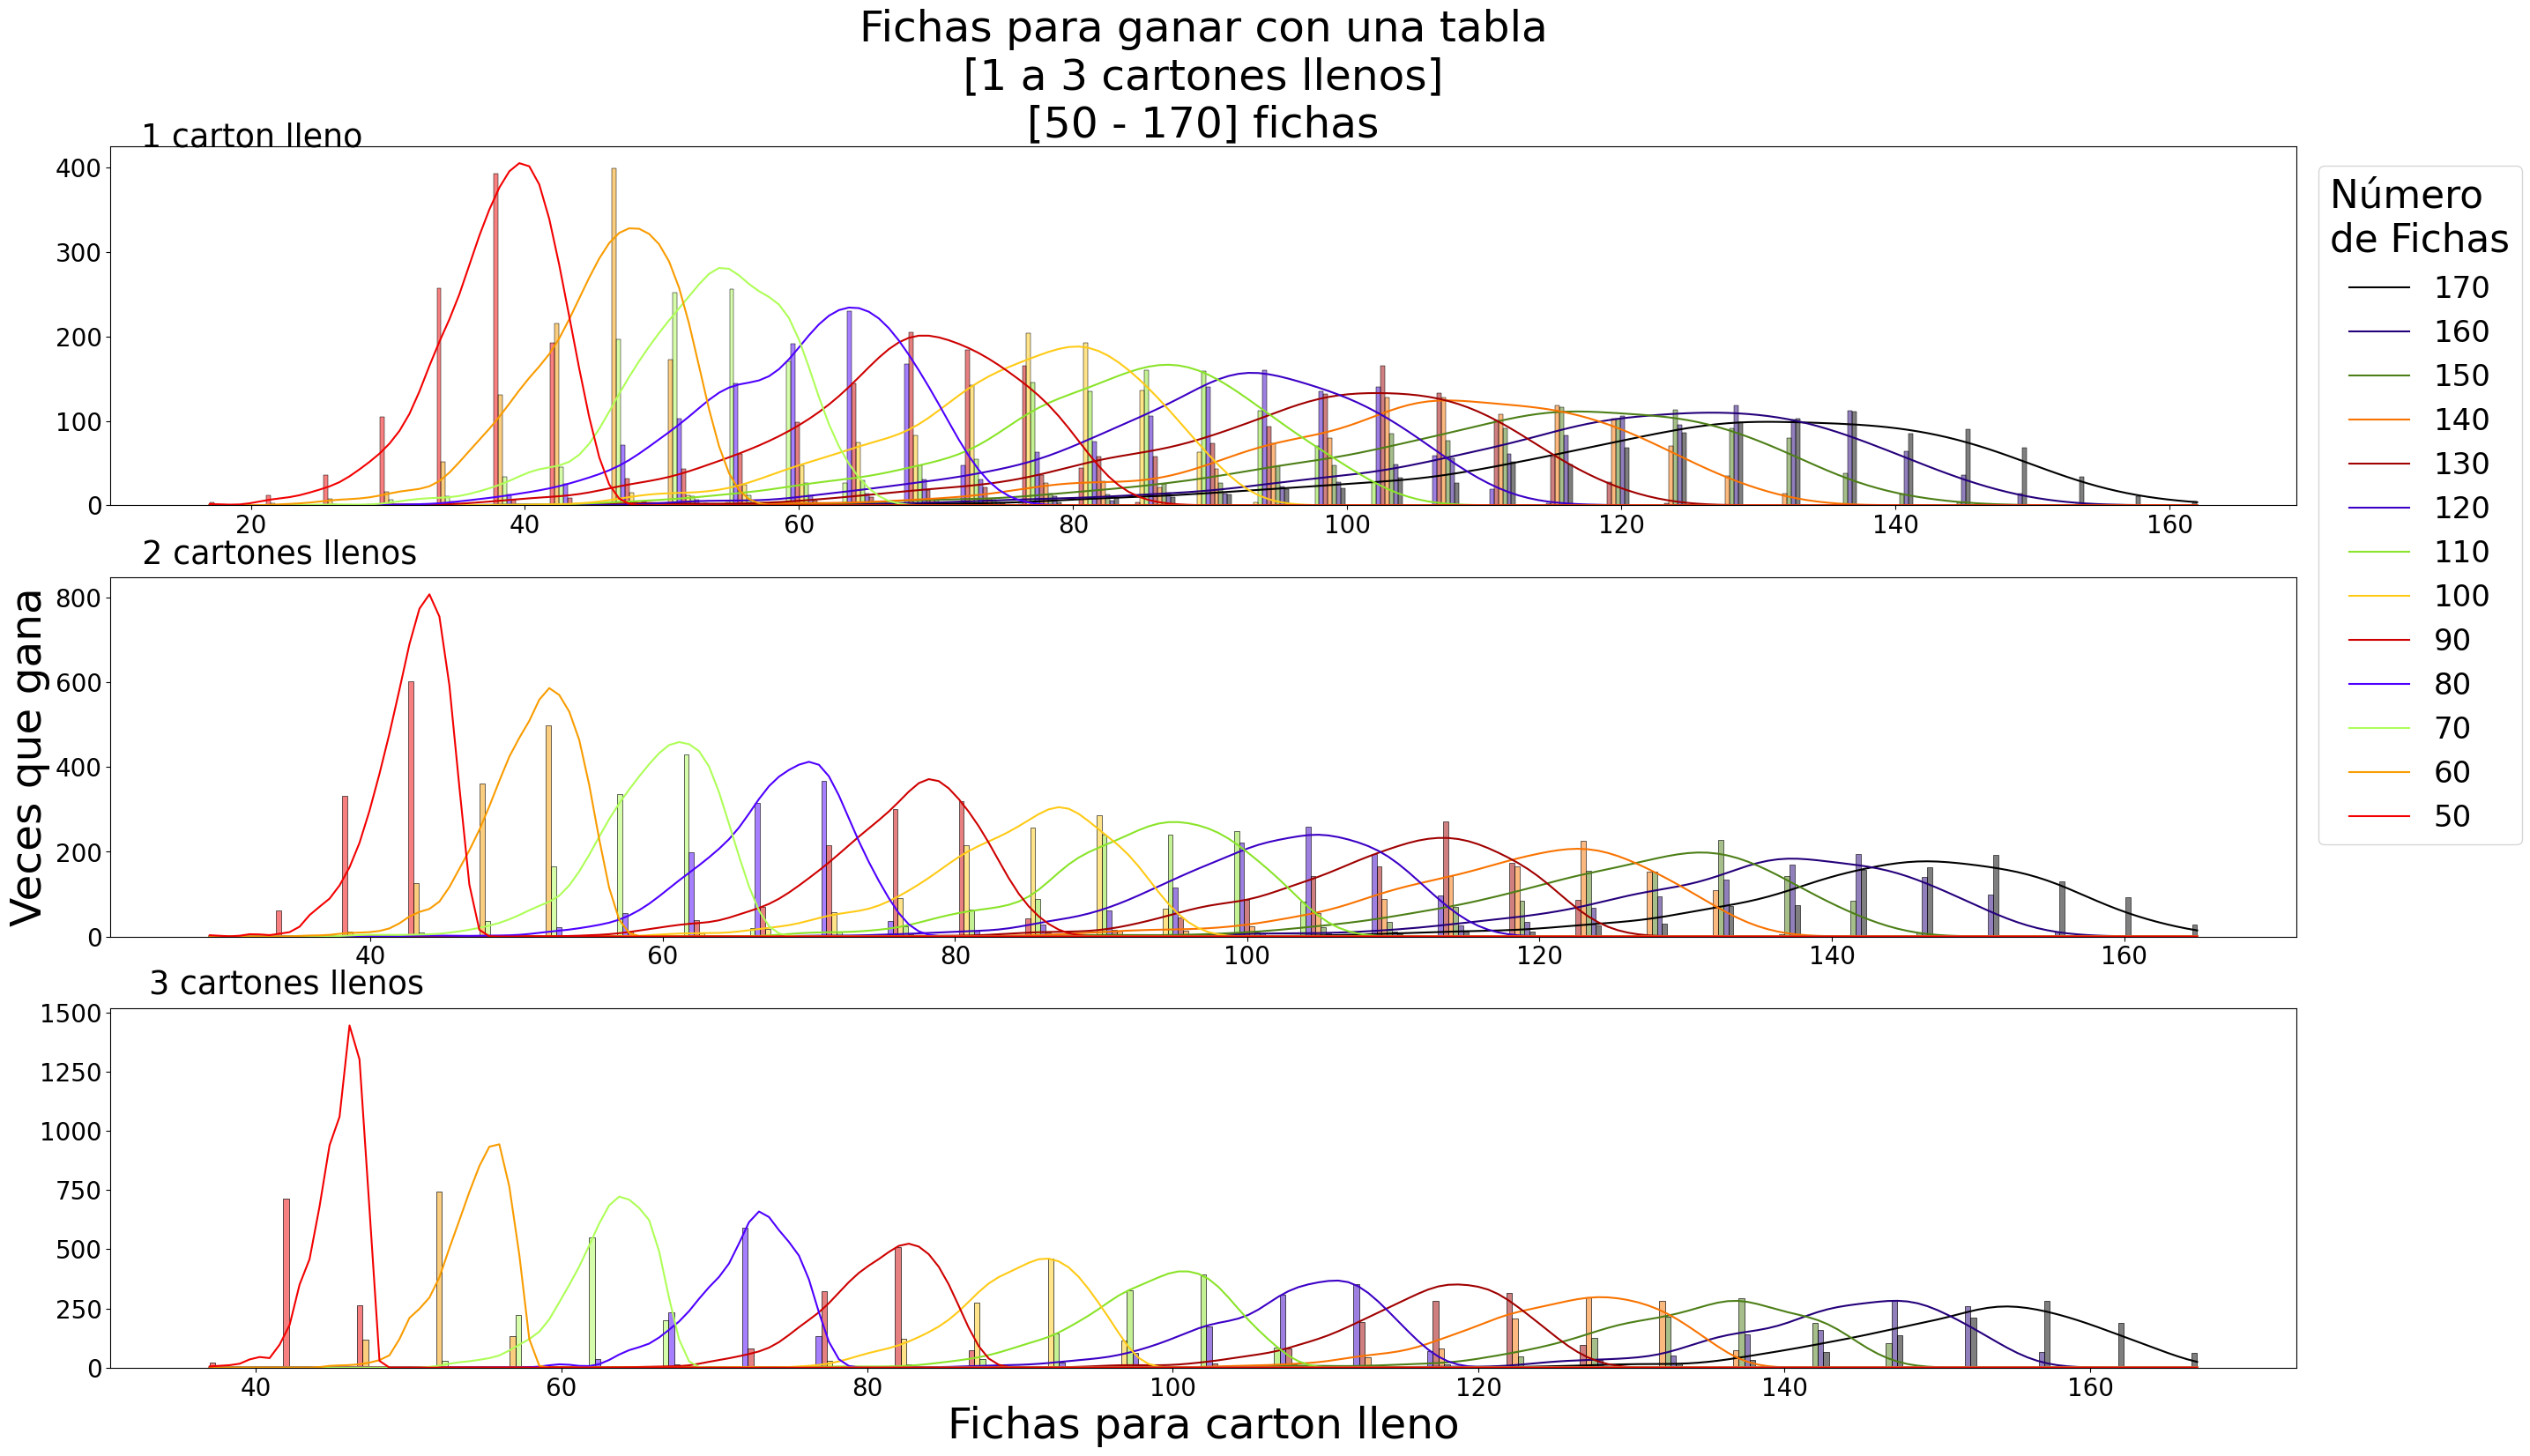

In [28]:
display(f)

Si queremos ver estos datos por separado por numero de fichas para 1, 2 y 3 cartones llenos, podemos anexar el siguente codigo.

In [6]:
tcc.toggle_cell_code("separado")

# Si te funciona ayudaria ingresar el eje axs para hacer una grid
def hist_loto_numfichas(df,bins,estilo,numFichas): # Genera el histograma de las fichas2win
    data = df[["fichasToWin","tab2win"]].loc[df['numFichas']==numFichas]
    
    size =12
    paleta = [ '#ff0000','#0000ff', '#666666']
    
    #['#f30000',`#f99c00', '#aefe57','#4e00ff'
    #,'#cf0000','#ffca16', `#8ae429','#3c00c6'
    #,'#a00000','#f97300', '#4d7f17','#25007b']
    
    fig, axs = plt.subplots(figsize=(5, 4), dpi=100)
    
    sns.histplot(data=data , x="fichasToWin", hue="tab2win" 
                 ,bins=bins ,shrink=0.8 ,multiple=estilo ,palette=paleta ,ax=axs)

    axs.set_title("Fichas para ganar con una tabla\n [1 a 3 cartones llenos] "
                  +str(numFichas)+' fichas'
                  , fontsize = size)
    axs.set_xlabel("Fichas para carton lleno", fontsize = size)
    axs.set_xticks(xticks_hist(data["fichasToWin"],bins), fontsize = size-size*.45)
    axs.set_ylabel("Veces que gana", fontsize = size)
    axs.legend( title='Carts. llenos', labels=["3","2","1"], fontsize = size-size*.3)#,'20','25','30'
    axs.set_yscale("log")
    
    fig.savefig('media/hist_loto_numfichas'+str(numFichas)+ '.png')
    return fig


Codigo

In [32]:
%%capture
fich01 = hist_loto_numfichas(df_loto,10,'dodge',50)
fich02 = hist_loto_numfichas(df_loto,10,'dodge',60)
fich03 = hist_loto_numfichas(df_loto,10,'dodge',70)
fich04 = hist_loto_numfichas(df_loto,10,'dodge',80)
fich05 = hist_loto_numfichas(df_loto,10,'dodge',90)
fich06 = hist_loto_numfichas(df_loto,10,'dodge',100)
fich07 = hist_loto_numfichas(df_loto,10,'dodge',110)
fich08 = hist_loto_numfichas(df_loto,10,'dodge',120)
fich09 = hist_loto_numfichas(df_loto,10,'dodge',130)
fich10 = hist_loto_numfichas(df_loto,10,'dodge',140)
fich11 = hist_loto_numfichas(df_loto,10,'dodge',150)
fich12 = hist_loto_numfichas(df_loto,10,'dodge',160)
fich13 = hist_loto_numfichas(df_loto,10,'dodge',170)

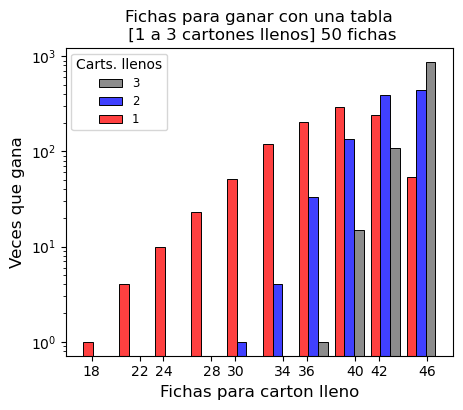

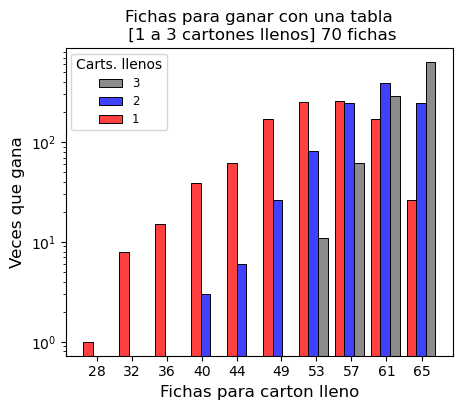

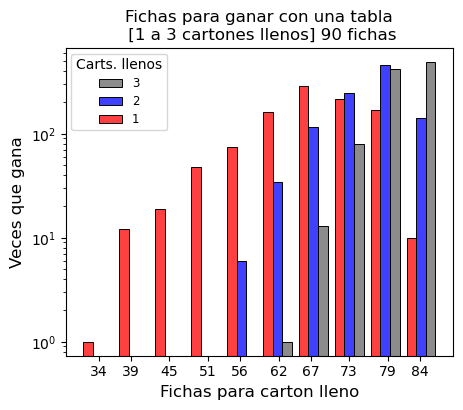

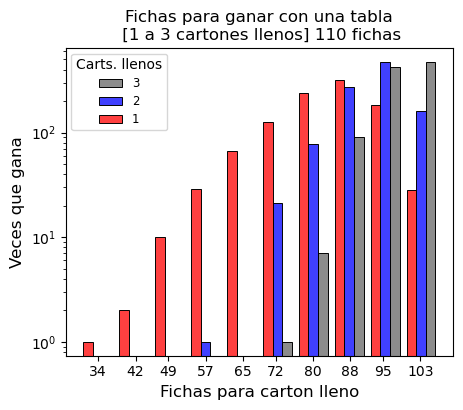

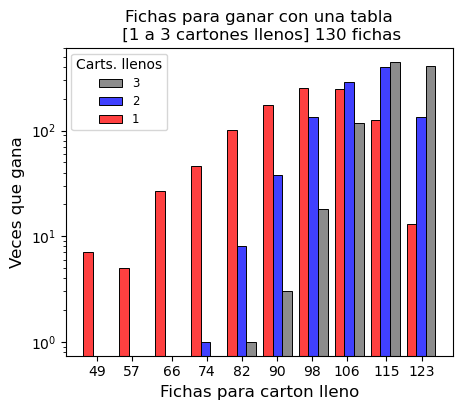

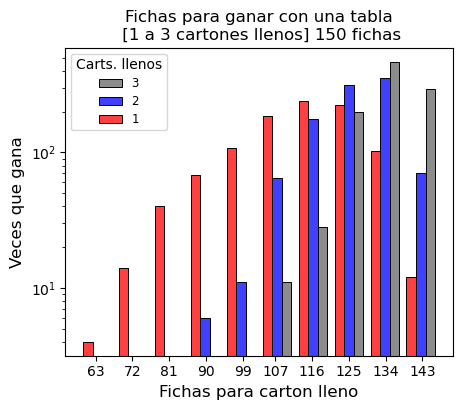

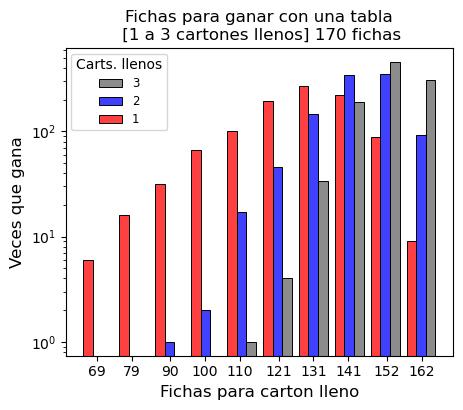

In [33]:
display(fich01,fich03,fich05,fich07,fich09,fich11,fich13)

Por ahora se aprecia como el numero de cartones llenos incrementa considerablemente el numero de fichas necesarias para ganar, porque se visualizan las barras grices mas a la derecha en cada gráfico. Todos los graficos tienen una distribucion parecida, pero a medida que aumenta el tamaño total de fichas, el margen de fichas donde aparece ganador la tabla se amplía.

Pero vamos hacer hacer una medida central y junto con la dispersion podremos visualizar mejor esta consecunecia.

**Lo siguente se aprecia con un joinplo**
```python
sns.jointplot(data=df_loto,y="fichasToWin", hue="tab2win",x="numFichas")

```
En la siguente gráfica se aprecia la dependencia casi lineal que existe entre el numero de fichas totales y las fichas que necesita un carton para ganar, ademas, tambien se ve mucho mejor como en numeros de cartones necesarios para ganar incrementa las fichas necesarias para ganar con un carton.
**pero no lo inclui aqui**

In [7]:
tcc.toggle_cell_code('describe')

###   Procesador de datos   ###

def describe_data_loto(df_lote):# Data de varaicion de fichas (descibe_relplot)
    fichasFttab = []
    for i in range(1,4):
        for j in range(50,180,10):
             a = df_loto['fichasToWin'].loc[(df_lote['tab2win']==i)&(df_lote['numFichas']==j)]
             describe = [i,j,a.mean(),a.std(),a.min(),a.max()]   
             #describe =pd.Series({ 'mean':a.mean(),'std':a.std(),'min':a.min(),'max':a.max()})   
             #fichasFttab = pd.concat([fichasFttab,describe.T],ignore_index=True)
             fichasFttab.append(describe)

    return  pd.DataFrame(fichasFttab,columns=["cards2win","num_fichas","mean_F2W","std_F2W","min_F2W","max_F2W"])

# Grafico de esta informacion
def plot_uni_describe(data,describ,col,axs,ax_lab=(1,1)):
    
    std0 = round(describ["std_F2W"].mean(),2)
    max0 = round(describ["max_F2W"].mean(),2)
    min0 = round(describ["min_F2W"].mean(),2)
    
    fit = np.round(linregress(data['numFichas'],data['fichasToWin'])[0],2) 
    
    g=sns.lineplot(data=data,x="numFichas", y="fichasToWin", color = col
                   , ax = axs , errorbar="sd", err_style="band" )
        
    axs.text(115,60,"         m  = "+str(fit) , horizontalalignment='left')
    axs.text(115,54,"        std = "+str(std0), horizontalalignment='left')
    axs.text(115,48,"min  std = "+str(max0), horizontalalignment='left') 
    axs.text(115,42,"max std = "+str(min0), horizontalalignment='left')


    
    if ax_lab[0] == 1:
        g.set(xlabel="Num. de Fichas")
    else:
        g.set(xlabel=None)
        
    if ax_lab[1] == 1:
        g.set(ylabel="Fichas para llenar carton")
    else:
        g.set(ylabel= None)



Codigo

In [10]:
tcc.toggle_cell_code('describerun')
# necesita la anterior, describe data

# Separacion de datos by Numero de cartones llenos para ganar
df0 =df_loto[df_loto["tab2win"]==1]
df1 =df_loto[df_loto["tab2win"]==2]
df2 =df_loto[df_loto["tab2win"]==3]


# Calcula de variables estadisticas de tendecia media y dispersion
describe = describe_data_loto(df_loto)

# Separacion de datos para 1,2 y 3 cartones
des0 = describe[describe["cards2win"]==1]
des1 = describe[describe["cards2win"]==2]
des2 = describe[describe["cards2win"]==3]

# Grid de graficos de la informacion descrita
size = 10# Tamaño de letra

f, axs = plt.subplots(1, 3, figsize=(12, 4))
    
f.suptitle("Inferencia del número de fichas")
plot_uni_describe(df0,des0,"#ff0000",axs[0],(0,1))
plot_uni_describe(df1,des1,"#0000ff",axs[1],(1,0))
plot_uni_describe(df2,des2,"#666666",axs[2],(0,0))

axs[0].set_title("1 carton lleno", fontsize = size)
axs[1].set_title("2 cartones llenos", fontsize = size)
axs[2].set_title("3 cartones llenos", fontsize = size)
plt.close(f)

f.savefig('media/inferencia_num_fichas_separado_tab_1-3.png')


Codigo

NameError: name 'describe_data_loto' is not defined

Vemos que si hay una dependencia lienal entre las fichas necesarias para ganar y las fichas totales, pero que la dispersion, representada por las barras verticales, se incremente a medida que aumentamos el número total defichas.

Abajo se puede notar un incremento de la pendiente para las tres formas de ganar.

In [9]:
tcc.toggle_cell_code('todomean')
def descibe_relplot(data):# Data de la variacion de fichas
    describe = describe_data_loto(data)
    paleta = [ '#ff0000','#0000ff', '#666666']
    
    ## DESCRIBE DATA PROSESS
    des1=describe[describe["cards2win"]==1]
    des2=describe[describe["cards2win"]==2]
    des3=describe[describe["cards2win"]==3]

    fit1 = np.round(linregress(des1['num_fichas'],des1['mean_F2W'])[0],2)
    fit2 = np.round(linregress(des2['num_fichas'],des2['mean_F2W'])[0],2)
    fit3 = np.round(linregress(des3['num_fichas'],des3['mean_F2W'])[0],2)
    
    # Draw graph
    
    g=sns.relplot(data=describe,x="num_fichas",hue="cards2win",y="mean_F2W",palette=paleta
                  ,kind="line")
    g.fig.set_size_inches(5,5)
    
    g.set(xlabel="Num. de Fichas",ylabel="Fichas para llenar carton")
    g._legend.set_title("Cartones \npara ganar")
    g._legend._legend_box.sep = 2  # move title down slightly
    ax = g.axes[0,0]
    fig= g.figure
    fig.suptitle("Inferencia del número de fichas")
    
    ax.text(140,96,"  M1\n"+str(fit1), horizontalalignment='left')
    ax.text(164,130,"  M2\n"+str(fit2), horizontalalignment='left')
    ax.text(140,140,"  M3\n"+str(fit3), horizontalalignment='left')
    sns.move_legend(g, "upper left", bbox_to_anchor=(.22, .87))
    
    fig.savefig('media/descibe_relplot.png')
    return fig

Codigo

In [43]:
%%capture
fdes =descibe_relplot(df_loto)

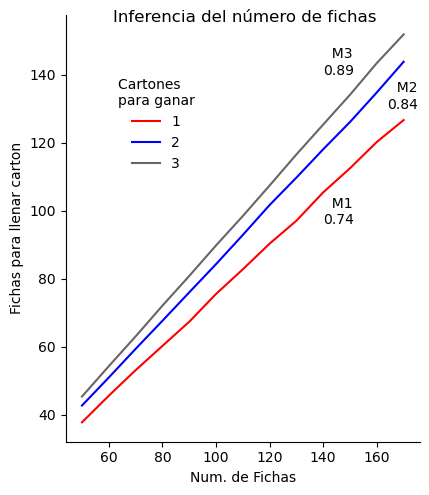

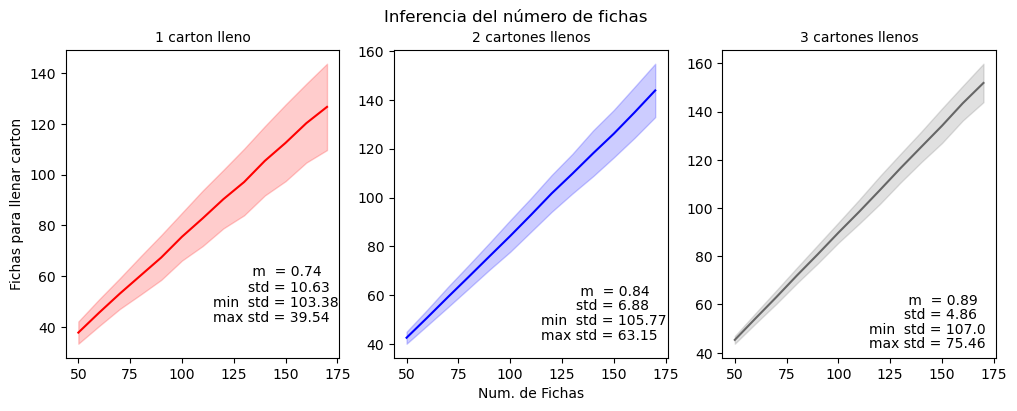

In [44]:
display(fdes,f)

podemos apreciar como a medida que aumenta el numero de fichas la dispersion de la medida central se va a ampliando, lo que significa que el rango de fichas necesarias para cumplir la condicion de ganar se amplia a medida que aumentamos el numero de fichas, pero se acorta, para una misma cantidad de fichas, a medida que se requieran mas cartones llenos para ganar.

### Inferencia del número de cartones

Usando la data de la 2da tanda de datos y de la 3ra tanda de datos (solo 1000 ronda de cada forma de ganar), vamos a ver como varia la cantidad promedio de fichas necesarias para ganar en funcion al número de cartones. Aprovecho destacar que la muestra de 100 cartons fui inclido parcialmente como modo de comparación.

In [12]:
tcc.toggle_cell_code('varioscartones')
def xticks_hist(data,bins_): # Calcula las marcas del histograma
    xticks = []
    a=np.histogram(data,bins=bins_)
    
    for i in range(len(a[1])-1):
        h =np.rint(((a[1][i+1]-a[1][i])/2)+a[1][i])
        xticks.append(h )
    return xticks

#xticks_hist(df_lote_20_30["fichasToWin"],20)

def hist_loto_numtab(data,bins,estilo,etiquetas): # Genera el histograma de las fichas2win
    
    size =35
    tsize = 24
    paleta =  ['#ff0000','#cc0033','#990066','#660099', '#3300cc', '#0000ff' ,'#000033' ]
    #paleta =  ['#ff00ff','#cc00ff','#9900ff','#6600ff', '#3300ff', '#0000ff'  ]
    
    #paleta = ['#f30000','#f99c00', '#aefe57','#4e00ff','#cf0000','#ffca16', '#8ae429'
    #         ,'#3c00c6','#a00000','#f97300', '#4d7f17','#25007b','#000000']
    
    #paleta =  ['#C0392B', '#9B59B6', '#2980B9', '#1ABC9C', '#D35400', '#B7950B','#34495E'
    #          ,'#ff7474', '#1a98b7','#930014', '#1ecfe5', '#f63713', '#0b6099' ]
    
    #['#f30000',`#f99c00', '#aefe57','#4e00ff'
    #,'#cf0000','#ffca16', `#8ae429','#3c00c6'
    #,'#a00000','#f97300', '#4d7f17','#25007b']
    
    fig, axs = plt.subplots(figsize=(30, 10), dpi=100)
    
    sns.histplot(data=data , x="fichasToWin", hue="numTablas", palette=paleta
                 ,bins=bins,shrink=0.8,multiple=estilo,ax=axs)

    axs.set_title("Fichas que llenan un carton con varias tablas "
                  +'['+str(data["tab2win"][0])+' carton(es) llenos]', fontsize = size)
    axs.set_xlabel("Fichas para carton lleno", fontsize = size)
    axs.set_xticks(xticks_hist(data["fichasToWin"],bins), fontsize = size-size*.45)
    axs.set_ylabel("Veces que gana", fontsize = size)
    axs.legend( title='Numero \nde tablas', labels=etiquetas, fontsize = size-size*.3)#,'20','25','30'
    axs.tick_params(axis='x', labelsize=tsize)
    axs.tick_params(axis='y', labelsize=tsize)
    
    plt.setp(axs.get_legend().get_title(), fontsize=size -size*.2)
    
    fig.savefig('media/hist_loto_numtab'+str(data["tab2win"][0])+'_d_'+ str(etiquetas[-1])
                +'_a_'+str(etiquetas[0])+'.png')
    return fig

Codigo

In [13]:
%%capture

df_loto1_all = pd.concat([df_1o80_lt1[0:1000],df_loto1],ignore_index=True)
df_loto2_all = pd.concat([df_1o80_lt2[0:1000],df_loto2],ignore_index=True)
df_loto3_all = pd.concat([df_1o80_lt3[0:1000],df_loto3],ignore_index=True)


f1=hist_loto_numtab(df_loto1_all,18,"dodge",['100','30','25','20','15','10','5'])
f2=hist_loto_numtab(df_loto2_all,18,"dodge",['100','30','25','20','15','10','5'])
f3=hist_loto_numtab(df_loto3_all,18,"dodge",['100','30','25','20','15','10','5'])

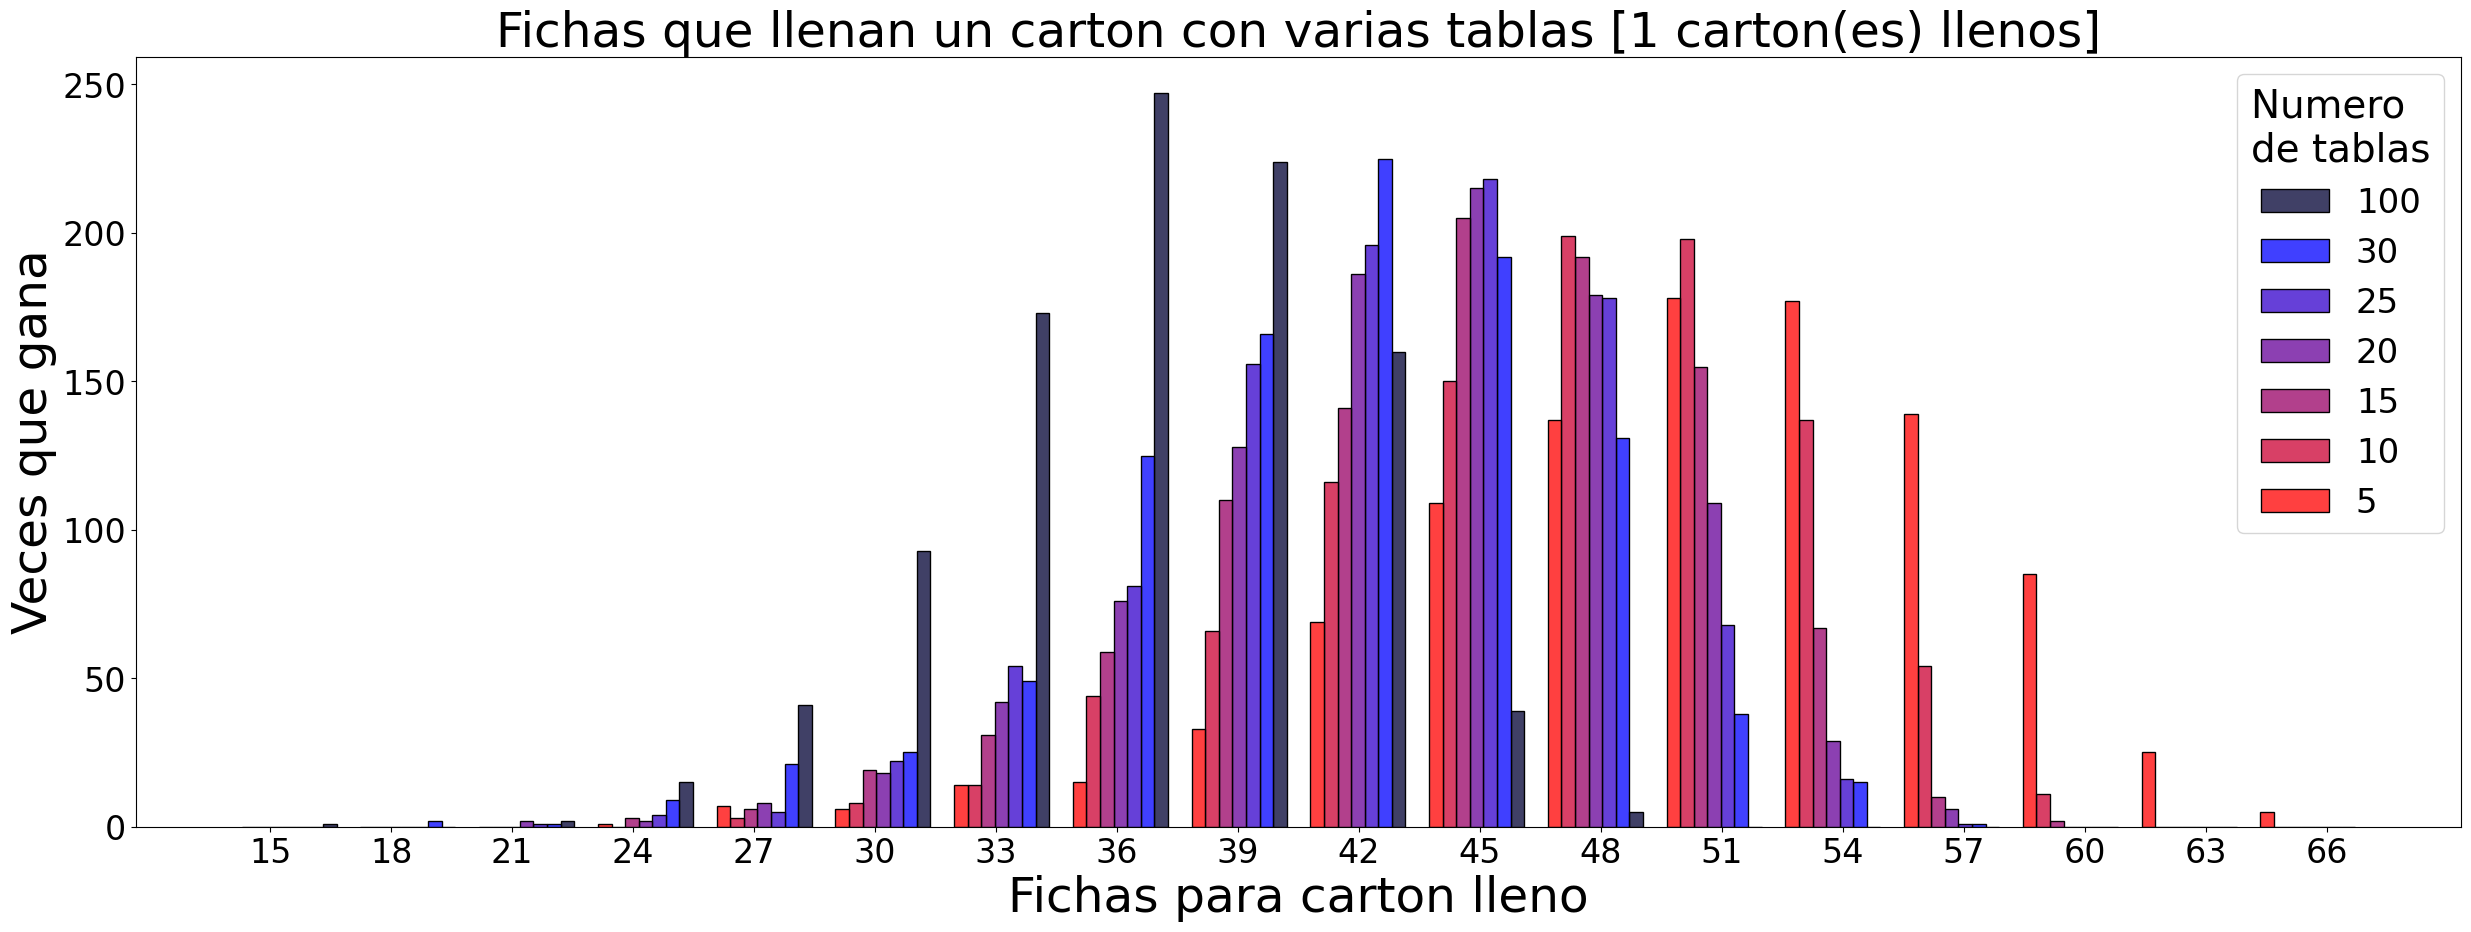

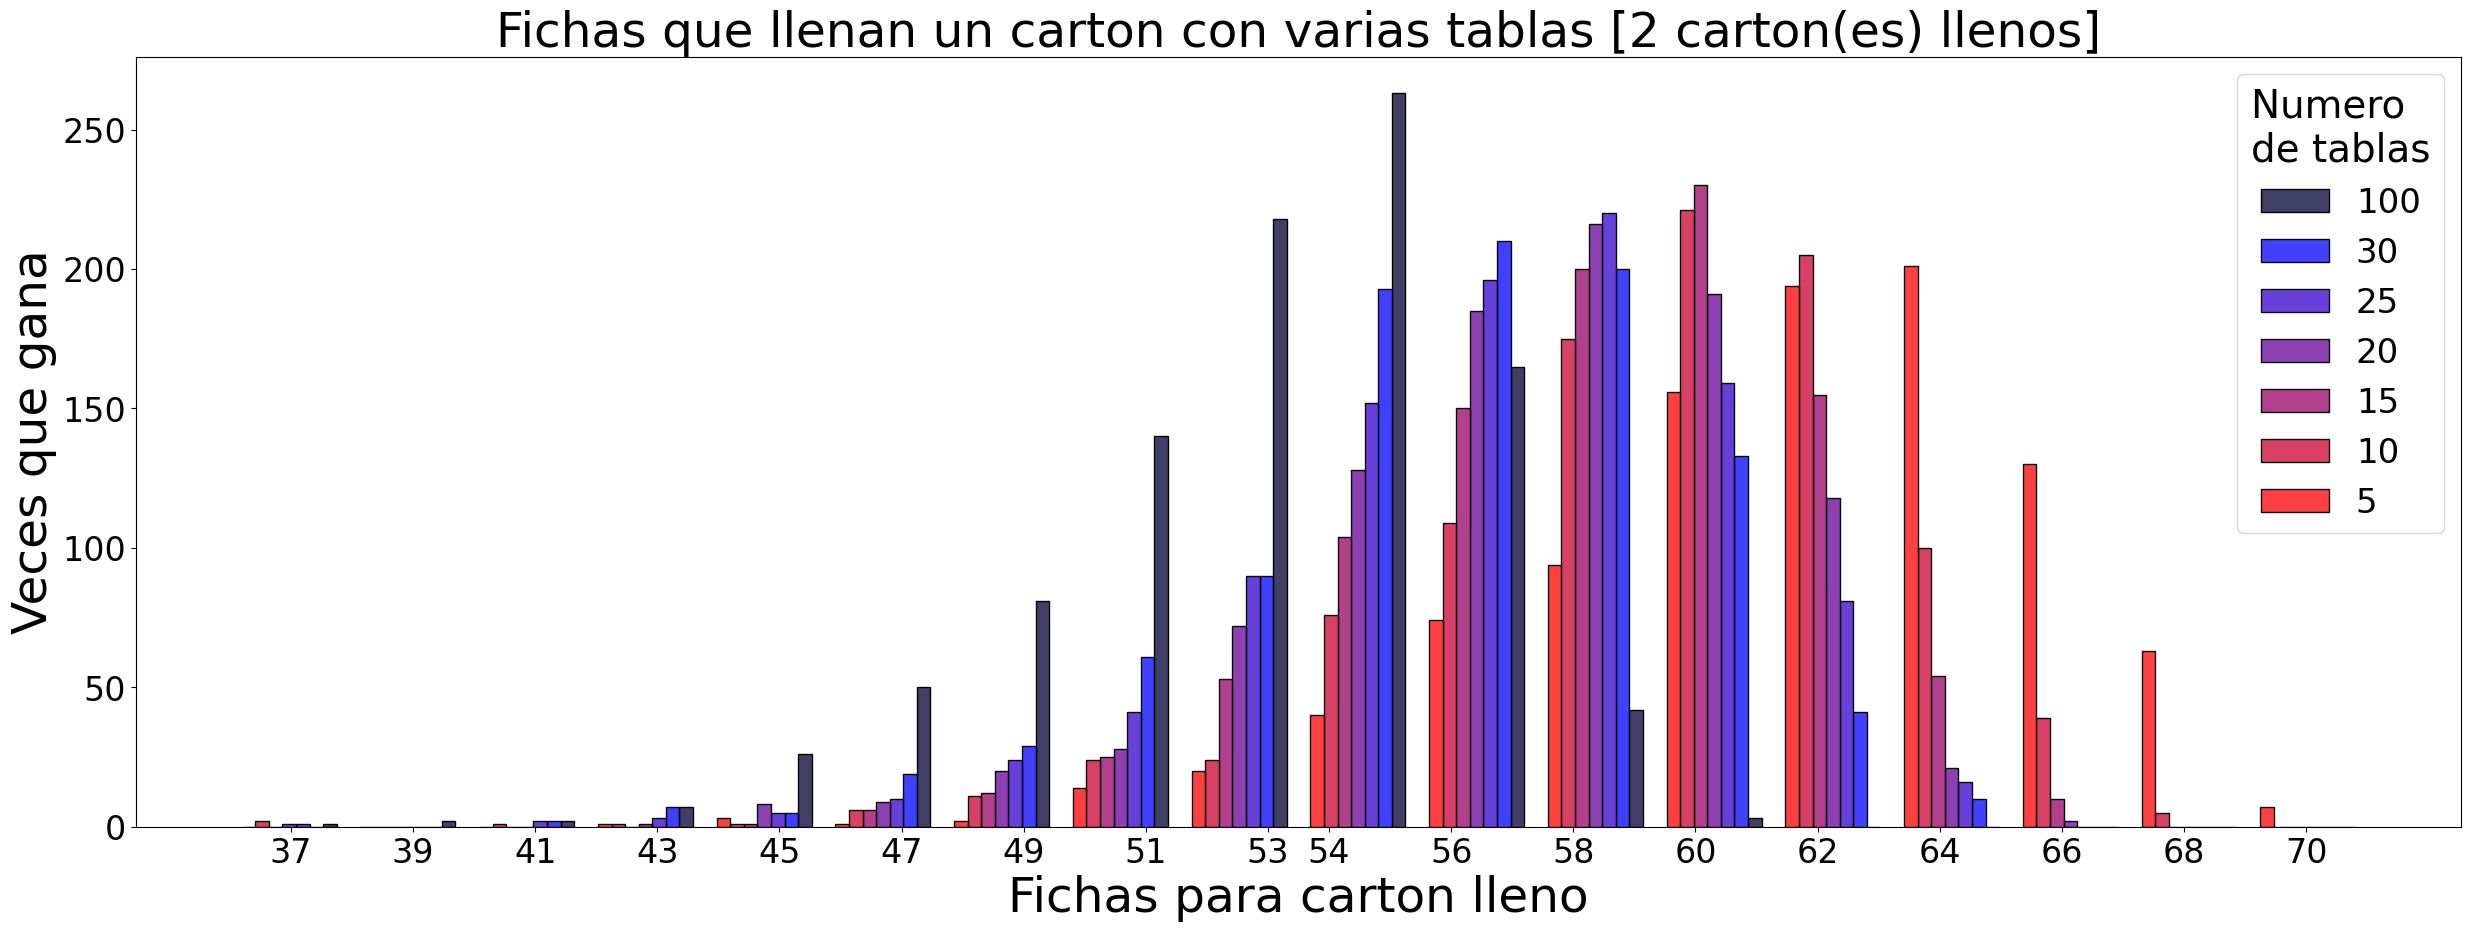

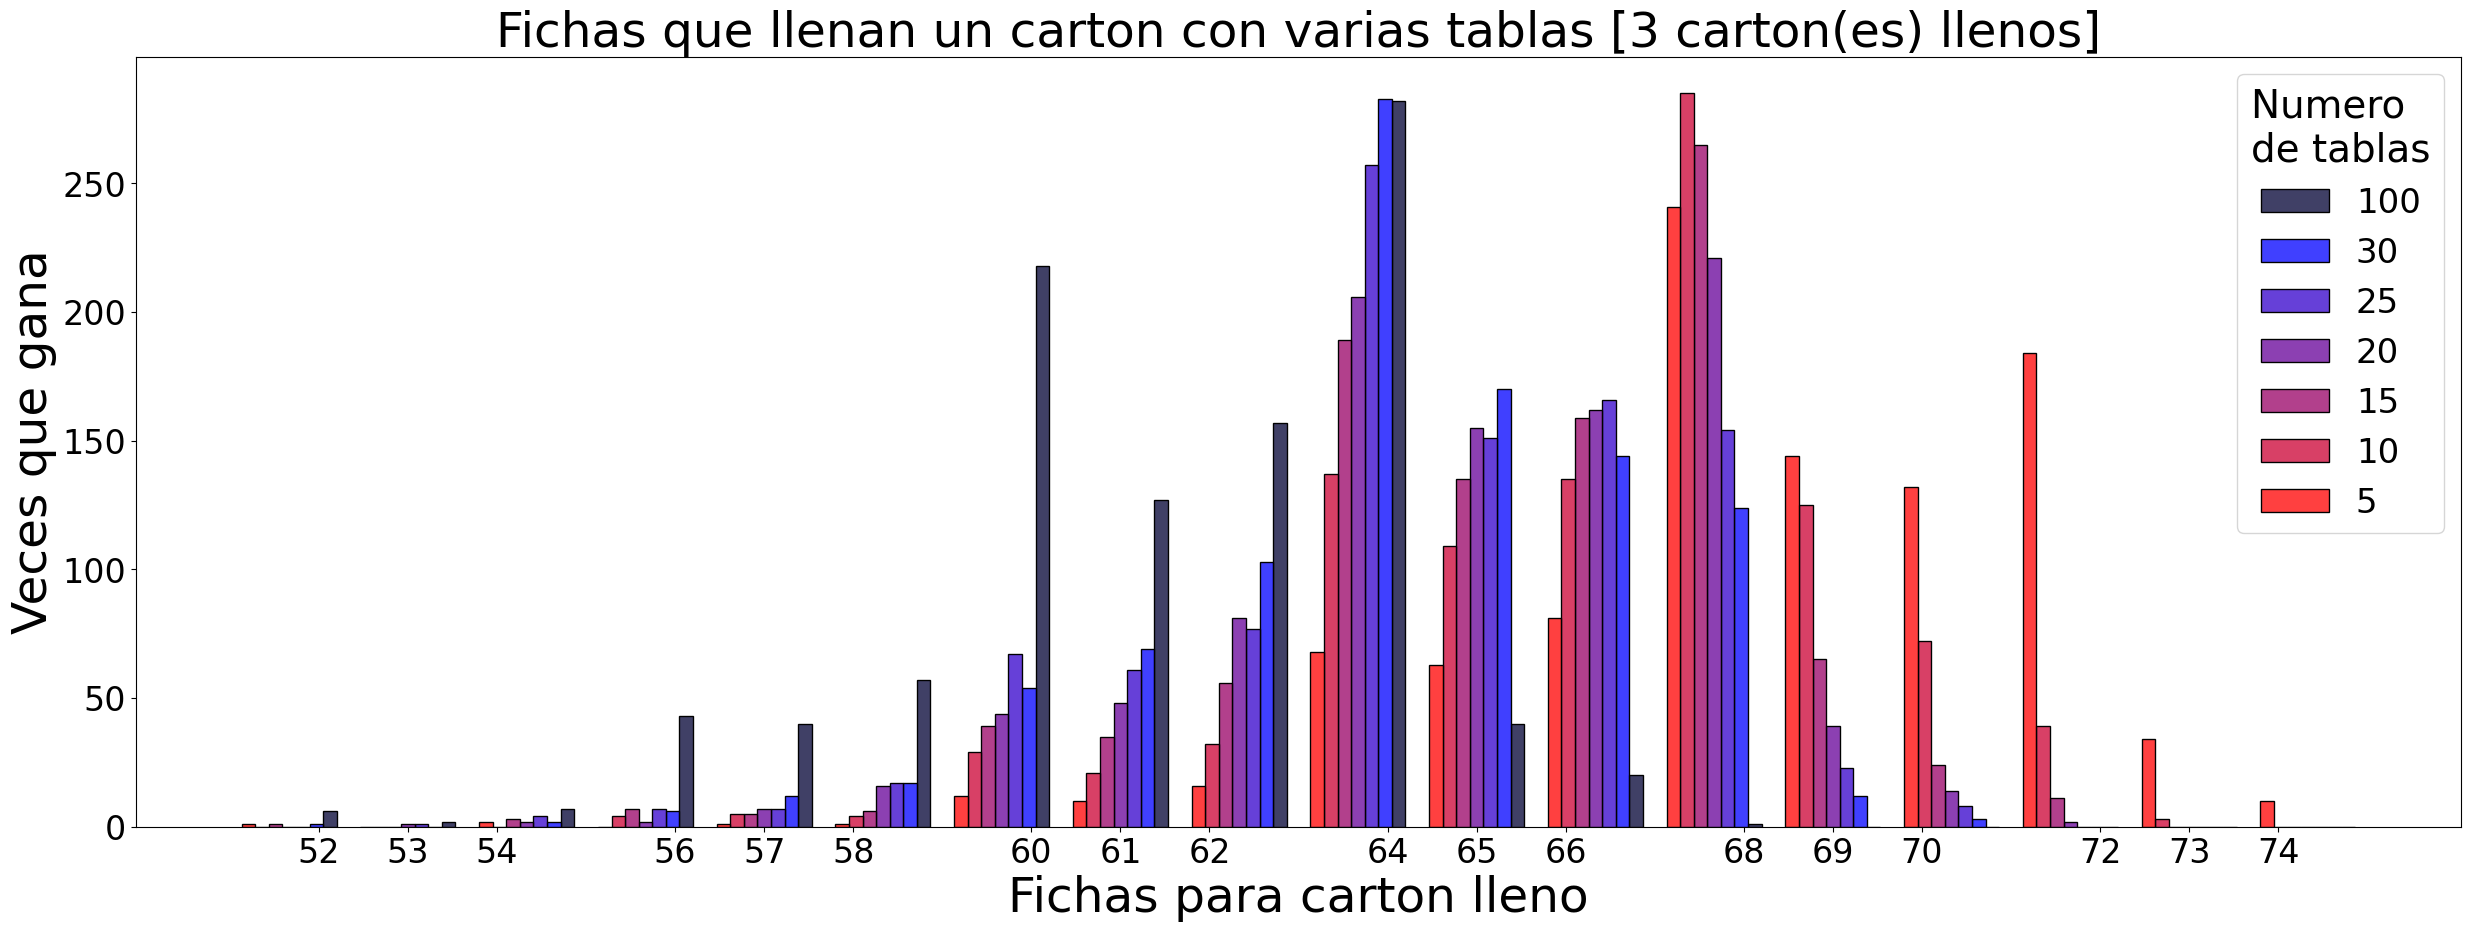

In [47]:
display(f1,f2,f3)

Se aprecia que a medida que aumenta el número de cartones vamos a notar que se necesitaran menos fichas para completar el carton, esto tiene muchisimo sentido, porque supongamos que juegan todas las combinaciones posibles para 80 fichas, para ganar loteria, solo necesitariamos 8 fichas, esto se complica para llenar 2 o 3 cartones, pero esta idea básica nos ayuda a tener una referencia para entender estos resultados. Si intemtamos graficar las distribucion de probabilidad de cada histograma se apreciará mejor estas gráficas.

In [11]:
tcc.toggle_cell_code('variacionescartonesKDE')
def hist_loto_numtab_kde(data,bins,estilo,etiquetas): # Genera el histograma de las fichas2win
    
    size =35
    tsize = 24
    paleta =  ['#ff0000','#cc0033','#990066','#660099', '#3300cc', '#0000ff' ,'#000033' ]
    
    fig, axs = plt.subplots(figsize=(30, 10), dpi=100)
    
    sns.histplot(data=data , x="fichasToWin", hue="numTablas",kde=True
                 ,bins=bins,shrink=0.8,multiple=estilo,palette=paleta,ax=axs)

    axs.set_title("Fichas que llenan un carton con varias tablas "
                  +'['+str(data["tab2win"][0])+' carton(es) llenos]', fontsize = size)
    axs.set_xlabel("Fichas para carton lleno", fontsize = size)
    axs.set_xticks(xticks_hist(data["fichasToWin"],bins), fontsize = size-size*.45)
    axs.set_ylabel("Veces que gana", fo
                   ntsize = size)
    axs.legend( title='Numero \nde tablas', labels=etiquetas, fontsize = size-size*.3)#,'20','25','30'
    axs.tick_params(axis='x', labelsize=tsize)
    axs.tick_params(axis='y', labelsize=tsize)
    
    plt.setp(axs.get_legend().get_title(), fontsize=size -size*.2)
    
    fig.savefig('media/hist_loto_numtab_kde'+str(data["tab2win"][0])+'_d_'+ str(etiquetas[-1])
                +'_a_'+str(etiquetas[0])+'_.png')
    return fig

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1126243071.py, line 17)

In [49]:
%%capture
kde1=hist_loto_numtab_kde(df_loto1_all,15,"dodge",['100','30','25','20','15','10','5'])
kde2=hist_loto_numtab_kde(df_loto2_all,15,"dodge",['100','30','25','20','15','10','5'])
kde3=hist_loto_numtab_kde(df_loto3_all,15,"dodge",['100','30','25','20','15','10','5'])

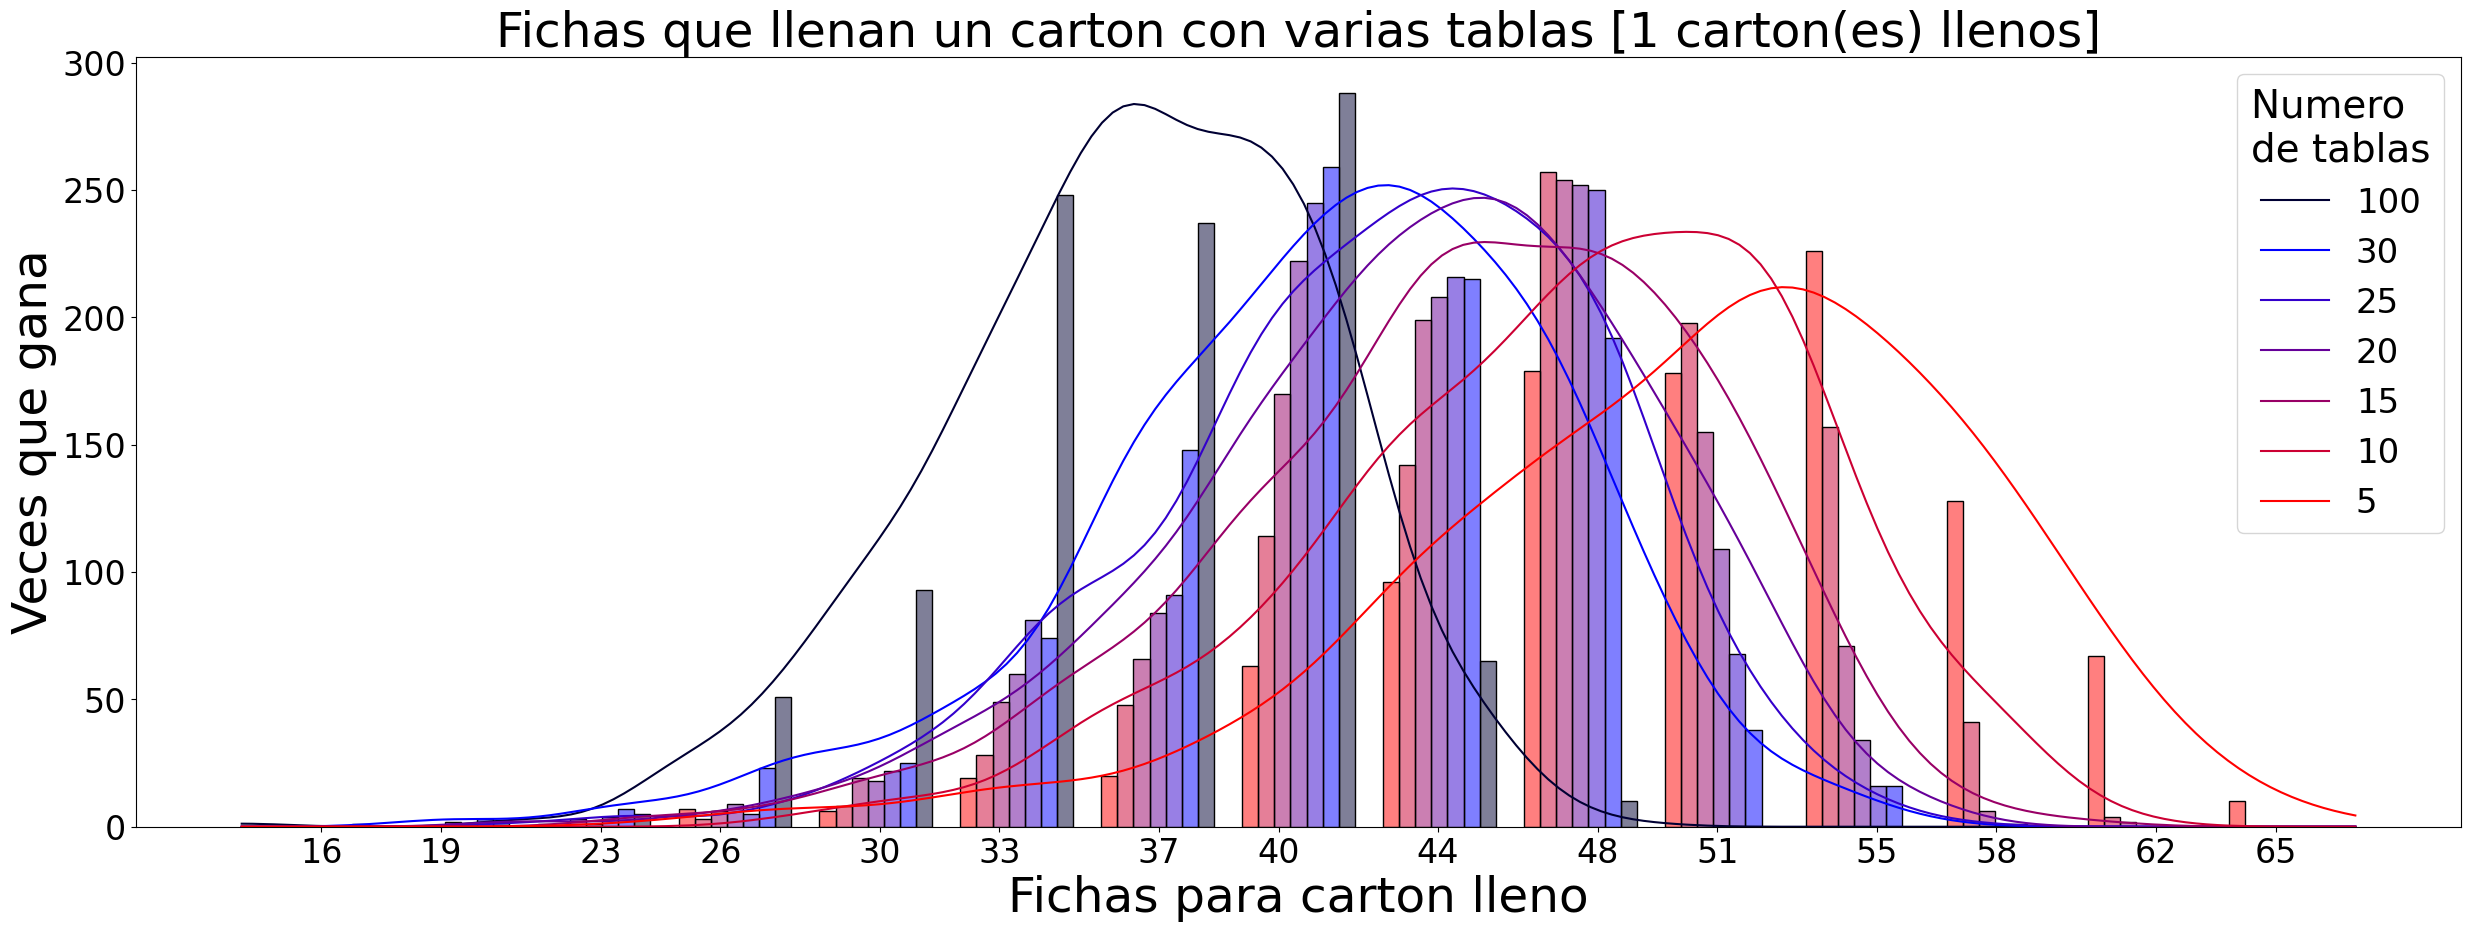

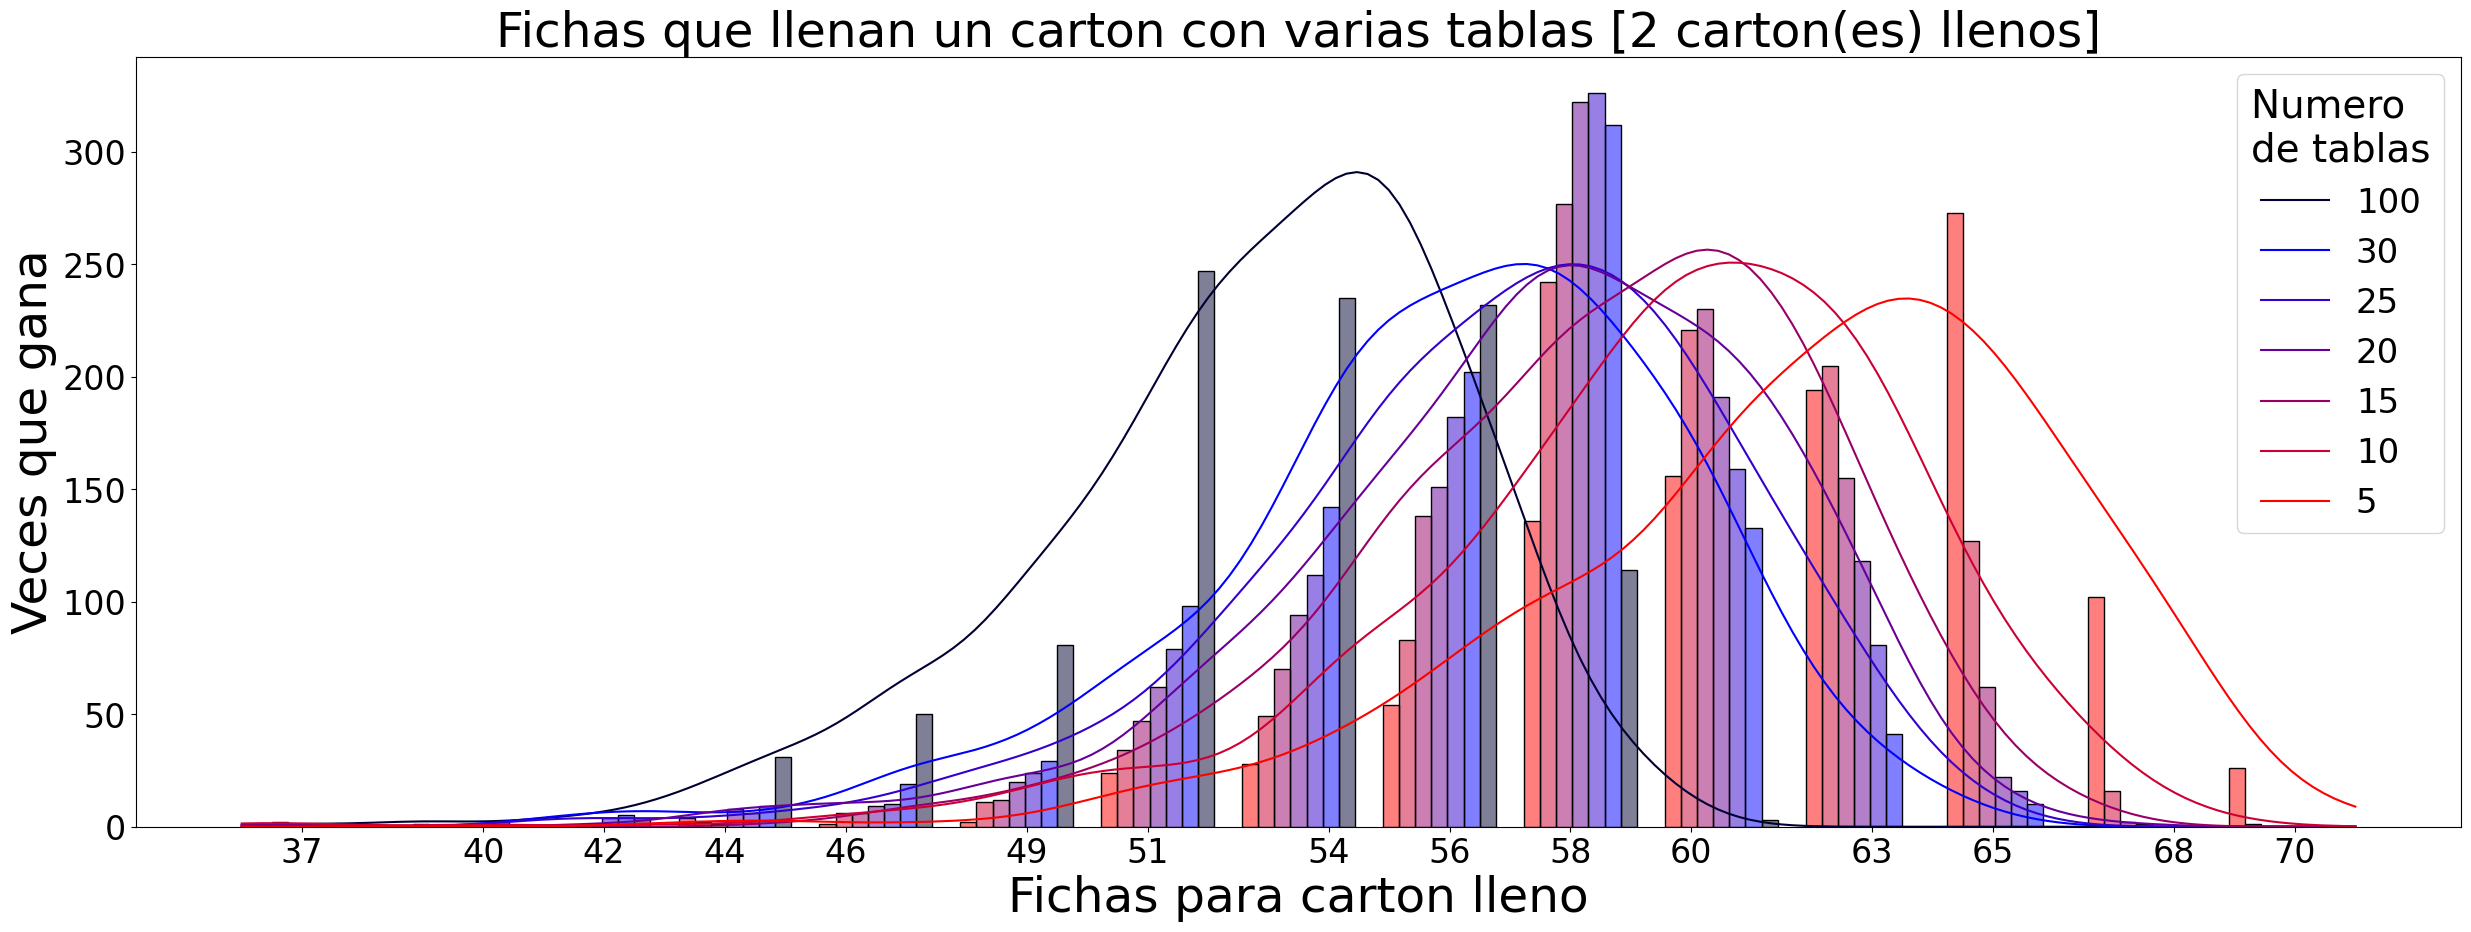

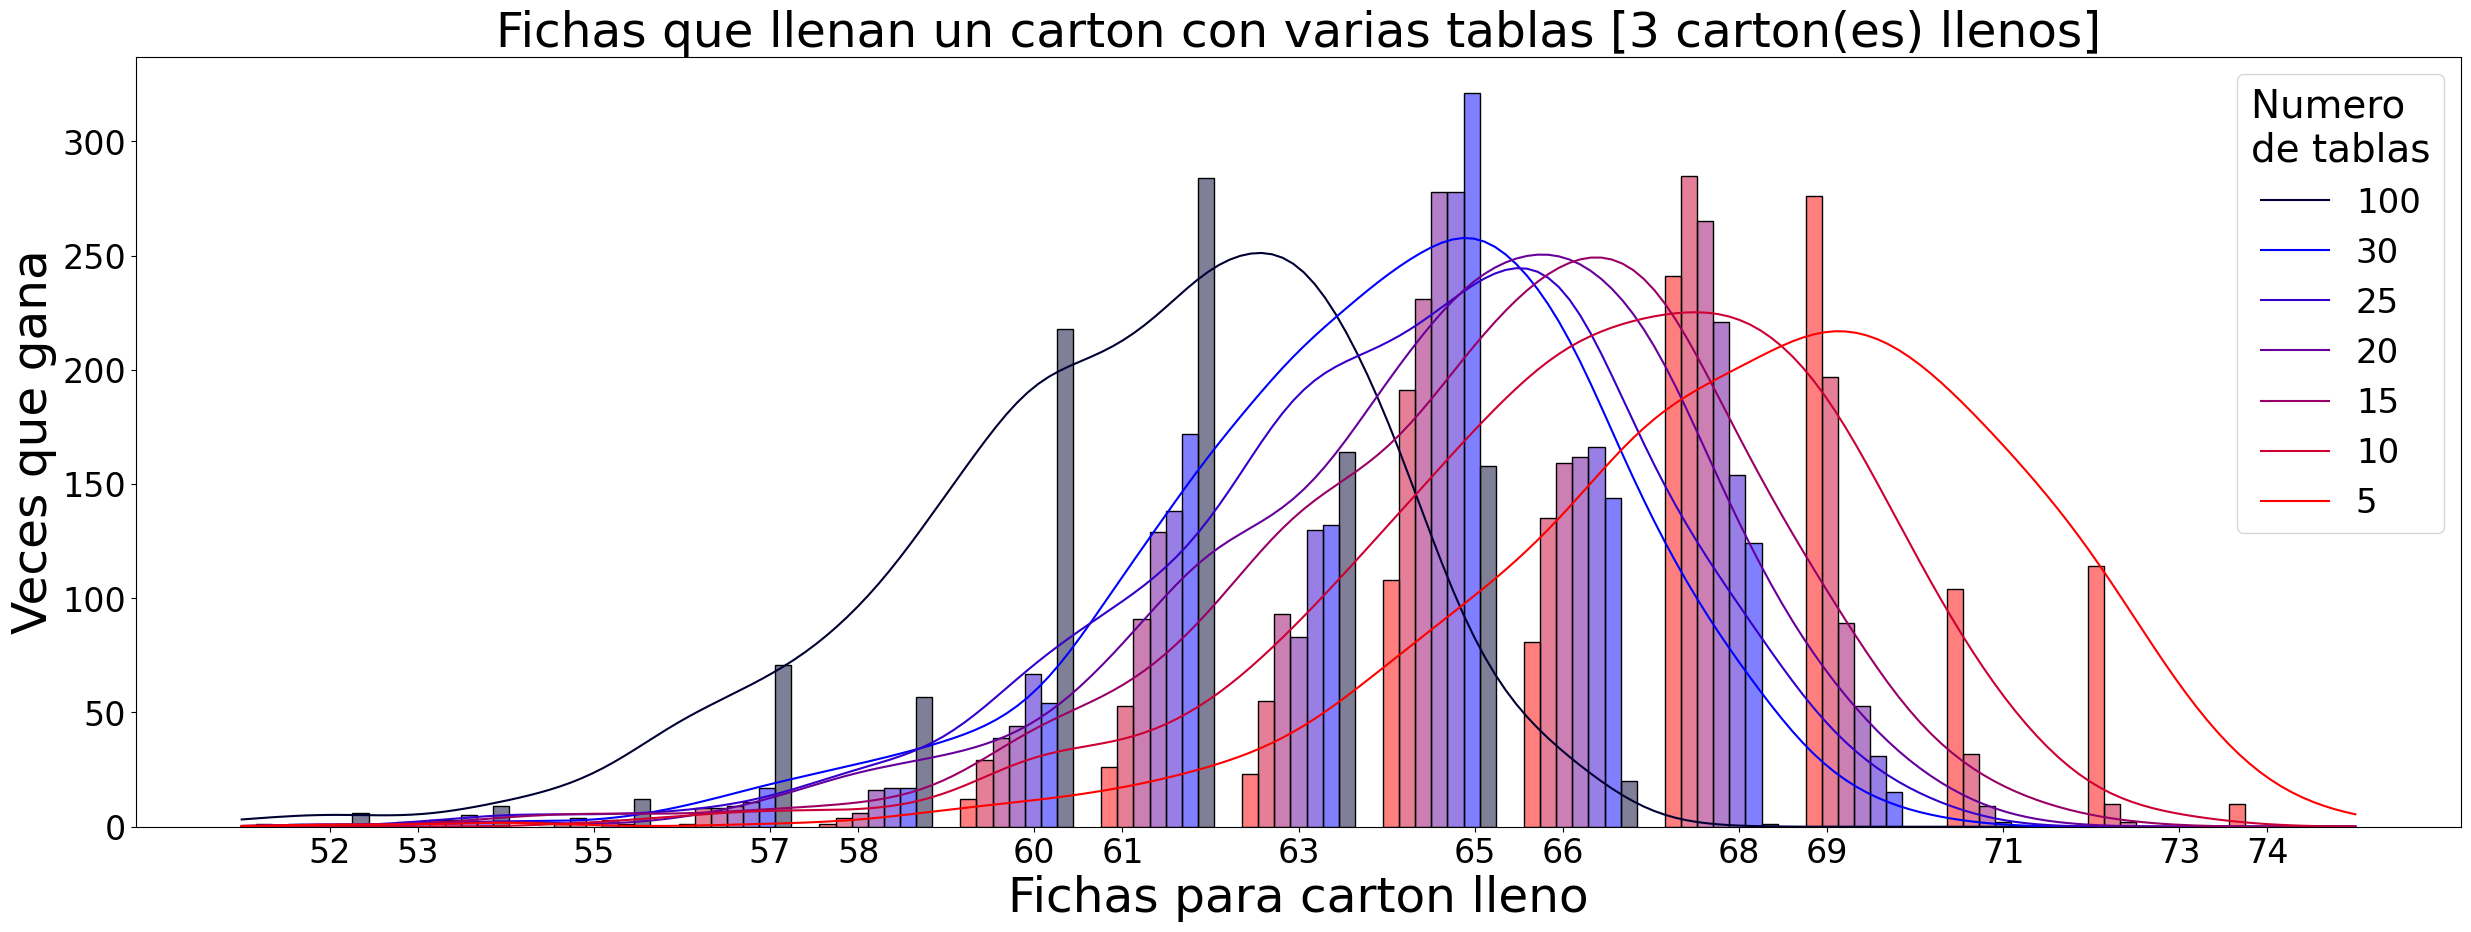

In [50]:
display(kde1,kde2,kde3)

Para un carton lleno vemos como los cartones afina el rango de fichas promedio para ganar, encambio para 3 cartones llenos esto no sucedede hecho podriamos decir que todas las curvas se mantienen con la misma fomra despues de los 15 cartones. Si queremos ver con mas resolucion esto podemos hacer los histogramas por separado, Vamos a juntar todos los datos en un dataframe para pode compara todo.

In [14]:
%%capture

###   Procesador de datos   ###

# concateno todos los datos
df_loto123 = pd.concat([df_loto1,df_loto2,df_loto3],ignore_index=True)# Primera sumulacion

df_1o80_123 = pd.concat([df_1o80_lt1,df_1o80_lt2,df_1o80_lt3],ignore_index=True)# Segunda simulacion #df_1o80_123 = pd.concat([df_1o80_lt1,df_1o80_lt2,df_1o80_lt3],ignore_index=True)# Segunda simulacion

# Cocatenamos todo lo anterior
df_nloto_123 = pd.concat([df_loto123,df_1o80_123],ignore_index=True)

#display(df_nloto_123)#[df_nloto_123["numTablas"]==5]

In [13]:
len(index)tcc.toggle_cell_code("data2HistUnico")

# Separando la data por numero de cartones

def data_hist_indi (data,T2W):
    TWnNTn = []
    for i in range(7):
        if i==6:
            indi = i+13
            TWnNTn.append(data["fichasToWin"][(data["numTablas"]==(5+5*indi)) 
                                                &(data["tab2win"]==T2W)   ].tolist())
        else:
            TWnNTn.append(data["fichasToWin"][(data["numTablas"]==(5+5*i)) 
                                                &(data["tab2win"]==T2W)   ].tolist())

    return TWnNTn

TW1NTn =  data_hist_indi (df_nloto_123,1)
TW2NTn = data_hist_indi (df_nloto_123,2)
TW3NTn = data_hist_indi (df_nloto_123,3)

Codigo

In [14]:
tcc.toggle_cell_code("HistUnico")
## prototipo para graficar la comparativa de datos cuando cambia el numero de cartones
## para 1 dos y 3 cartones llenos

def hist_fich2win_tab2win(df_data123,i,bins):
    
    #i=2
    fsize= 7
    #bins = 18
    
    TW1NTn = df_data123[0]
    TW2NTn = df_data123[1]
    TW3NTn = df_data123[2]
    
    #TW1NTn = data_hist_indi (df_loto123,1)
    #TW2NTn = data_hist_indi (df_loto123,2)
    #TW3NTn = data_hist_indi (df_loto123,3)
    
    f, axs1 = plt.subplots(1,3, figsize=(12, 3.5))
   
    a1= axs1[0].hist(TW1NTn[i] ,bins=bins,color="#ff0000",edgecolor = 'black')
    a2= axs1[1].hist(TW2NTn[i] ,bins=bins,color='#0000ff',edgecolor = 'black')
    a3= axs1[2].hist(TW3NTn[i] ,bins=bins,color="#666666",edgecolor = 'black')

    minx_ = a1[1].min()-a1[1].min()*.1
    maxx_ = a3[1].max()+a3[1].max()*.1
    maxy_ = max([a1[0].max(),a2[0].max(),a3[0].max()]) 
    xticks = ticks_hist(a1,a2,a3)


    maxy_ = max([a1[0].max(),a2[0].max(),a3[0].max()]) 
    xticks = ticks_hist(a1,a2,a3)

    axs1[0].set_ylim(0,maxy_+maxy_*.05)
    axs1[1].set_ylim(0,maxy_+maxy_*.05)
    axs1[2].set_ylim(0,maxy_+maxy_*.05)
    axs1[0].set_xlim(minx_,maxx_)
    axs1[1].set_xlim(minx_,maxx_)
    axs1[2].set_xlim(minx_,maxx_)
    axs1[0].set_xticks(xticks)
    axs1[1].set_xticks(xticks)
    axs1[2].set_xticks(xticks)
    axs1[0].set_title("1 caton lleno",fontsize=fsize)
    axs1[1].set_title("2 catones llenos",fontsize=fsize)
    axs1[2].set_title("3 catones llenos",fontsize=fsize)
    
    if i>5:
        f.suptitle("Comparacion numfichas para ganar con "+str(100)+" cartones\n \n")
        f.savefig("media/hist_comp_numFichas2win"+str(100)+"carts.png")
    else:
        f.suptitle("Comparacion numfichas para ganar con "+str(5+5*i)+" cartones\n \n")
        f.savefig("media/hist_comp_numFichas2win"+str(5+5*i)+"carts.png")

    return f

Codigo

In [92]:
%%capture
f0=hist_fich2win_tab2win([TW1NTn,TW2NTn,TW3NTn],0,15)
f1=hist_fich2win_tab2win([TW1NTn,TW2NTn,TW3NTn],1,15)
f2=hist_fich2win_tab2win([TW1NTn,TW2NTn,TW3NTn],2,15)
f3=hist_fich2win_tab2win([TW1NTn,TW2NTn,TW3NTn],3,15)
f4=hist_fich2win_tab2win([TW1NTn,TW2NTn,TW3NTn],4,15)
f5=hist_fich2win_tab2win([TW1NTn,TW2NTn,TW3NTn],5,15)
f6=hist_fich2win_tab2win([TW1NTn,TW2NTn,TW3NTn],6,15)

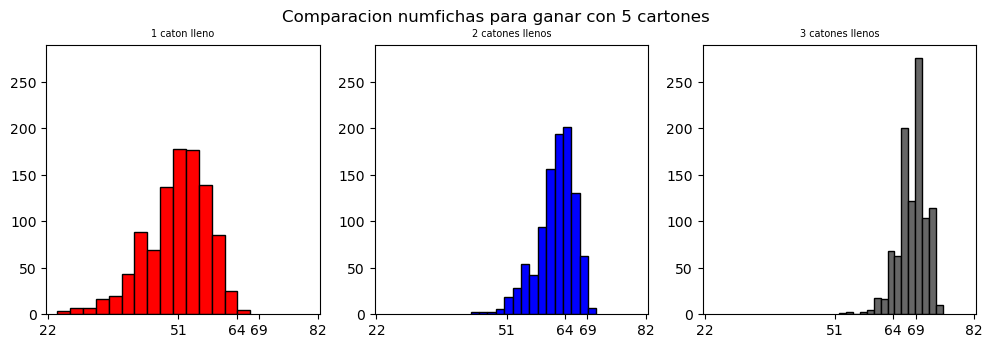

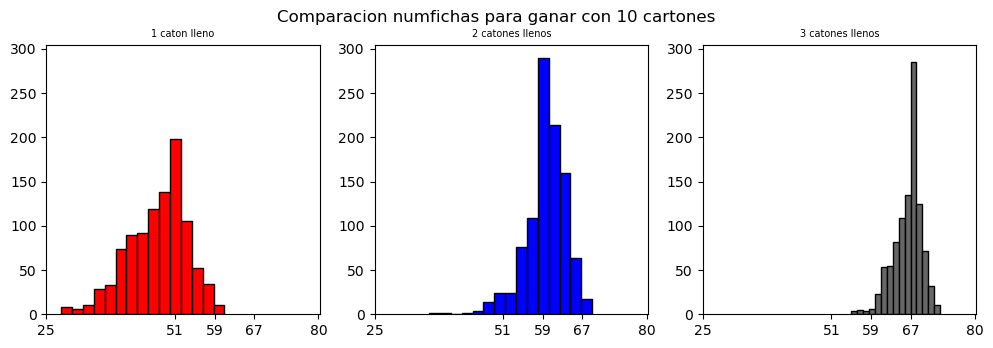

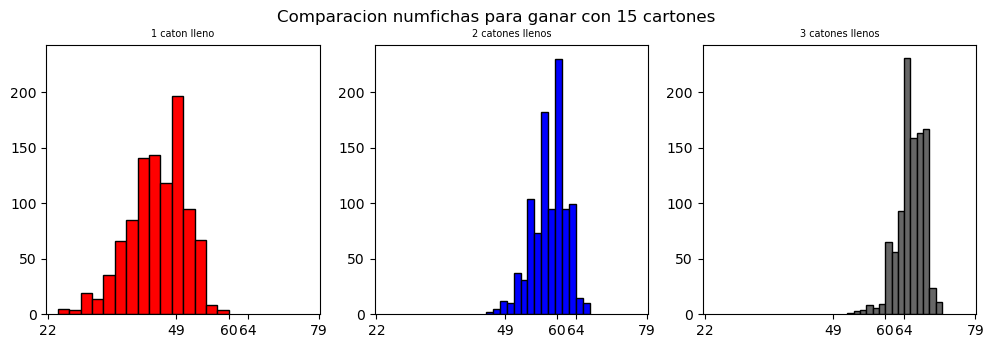

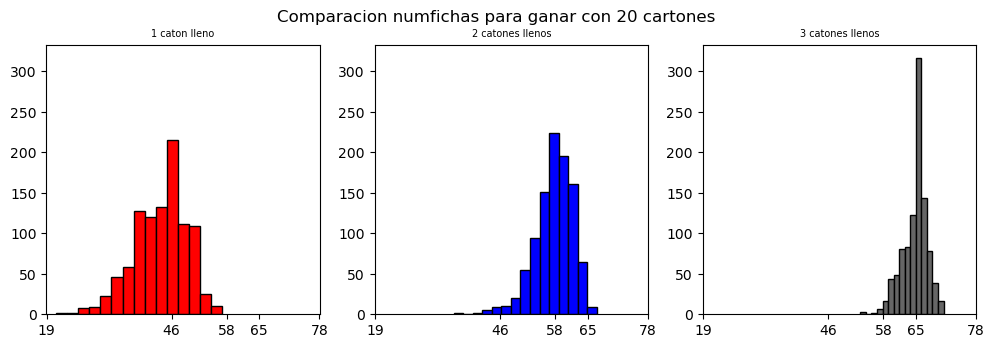

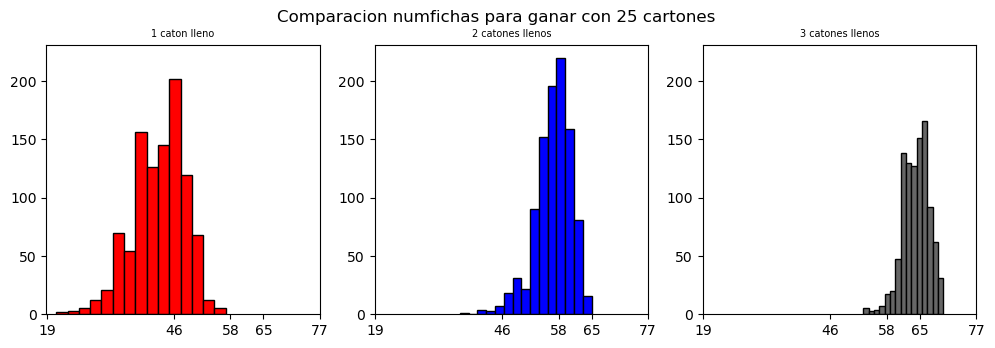

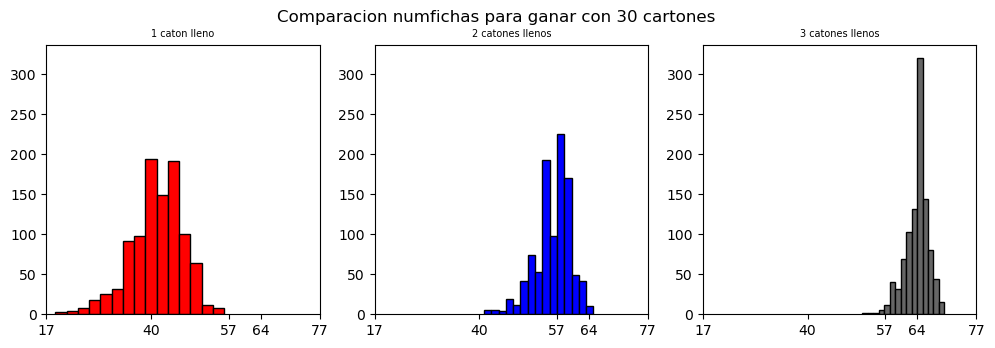

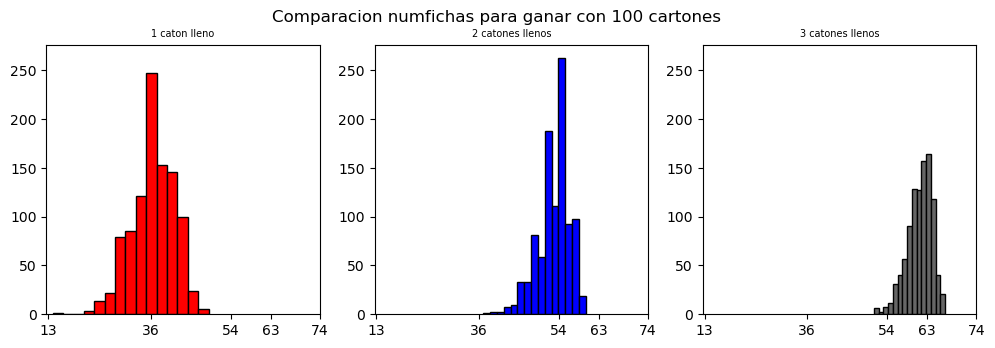

In [93]:
display(f0,f1,f2,f3,f4,f5,f6)

En el grafico se colocaron solo las marcas x correspondiente el maximo de eventos, el minimo y el maximo. Por ejemplo para 5 cartones. con un carton lleno (barras rojas) nuestro maximo esta 51, con 2 cartones llenos (barras azules) nuestro maximo esta en 64 y para 3 cartones llenos, la barras maxima esta en 69, ademas se marca el minimo de todos los caso y el maximo numero de fichas entre todos los casos.

Para un carton lleno vemos que a mendida que aumentan los cartones el promedio maximod e fichas necesarios para cantar loteria va de 51 a 36 fichas, para 2 cartones esta brecha es mas corta pues tansolo va de 64 a 54, y para 3 cartones esa brecha es aun más corta, pues va de 69 a 63. Ademas se aprecia que el numero de cartones va ampliando el rango de fichas para ganar.

## ¿Cuantas veces he ganado?

para esta parte vamos a usar los datos de la 3 simulacion, comparando las veces que gana

A continuacion tenemos el dodigo de las siguentes funciones

-  gen_cartones(nfichas,tabs, metodo)  
    - genera cartones ingresado en numero de fihcas, el numero de tablas y el metodo que puede ser un string con  "aleatorio","unico","mismos"
-  count_tabsWin(tab,vwin,df_tabWin)
    - Cuenta las veces que un carton gana sin indexado y filtrando el número de veces que gana, esto lo hace ingresando nuestra tabla, el número de veces que gana, y la data de los cartones ganadores `df['tabs']`.
-  count_times_win(data_a) # Data de count_tabsWin
    - cuenta las veces que mi carton gana en comparacion con los demas. solo ingresamo la data que resulta de la funcion anterior.
    
Estas funciones quedarán en desuso.


In [21]:
tcc.toggle_cell_code('gencartones')
## Viejo
###   genera los cartones   ###   

def gen_cartones(nfichas,tabs, metodo):# método = "aleatorio","unico","mismos"
    tablas = []
    checks =  []
    if metodo == "aleatorio":
        rng = np.random.default_rng()
        for i in range(tabs):
                tablas.append(rng.choice(range(1, nfichas), size=(6, 8), replace=False))
                
    elif metodo == "unico":
        tablas.append(np.random.default_rng(1).choice(range(1, nfichas), size=(6, 8), replace=False))
        rng = np.random.default_rng()
    
        for i in range(1,tabs):
            tablas.append(rng.choice(range(1, nfichas), size=(6, 8), replace=False))
        
    elif metodo == "mismos":
        for i in range(tabs):
            rng = np.random.default_rng(i)
            tablas.append(rng.choice(range(1, nfichas), size=(6, 8), replace=False))
        
    else:
        print('método = "aleatorio","unico","mismos"')
        
      
    check = np.zeros((tabs,6,8))
    return (tablas, check)

###   Cuenta las veces que cada tabla gana usano unique   ###
            


Codigo

In [22]:
tcc.toggle_cell_code('multiplex_y_count')

# Hace una lisdata multiplexada (Tab,Cartones) de todas la tablas

def lista_tabs_mpx(d_tab): # Retorna la lista indexada de tablas y cartones
    cont =0
    card = ['A','B','C','D','E','F'] # IDX de cartones
    
    tab_list = []                    # lista de tablas
    idx_tabs = []                    # list. indices tablas
    idx_card = []                    # list. indices cartones
    
    for j in d_tab:
        idx = '{0:0>2}'.format(cont) # Formato a 2 caracteres: (para 3 caracteres '{0:0>3}')

        for i in zip(card,j):
            idx_tabs.append(idx)     # idx tablas
            idx_card.append(i[0])    # idx cartones
            tab_list.append(str(i[1].tolist())) # cartones
            
            #print(i[1].tolist())

        cont +=1

    index = pd.MultiIndex.from_tuples(list(zip(idx_tabs,idx_card)),names=['tab','card'])
    
    return pd.Series(tab_list, index=index)

###   Hace el conteo de la data con los cartones ganadores 

def count_tabl_win_mpx(data_loto,list_de_tabla):
    t_tabl = data_loto.copy()          # Data de cartones ganadores "tablas_1o80_lt2" 
    list_tabl = list_de_tabla.copy()   # Data de lista solo las tablas jugando
    count_tab =  pd.Series(np.zeros(len(list_tabl), int) # conteo en 0
                           ,index=list_tabl.index        # indice de lista de tablas
                           ,name='conteo de victorias')  # Nombre de la Series
    
    # Cuenta cuantas veces la tabla gana mi carton de la data    
    for j_tab in t_tabl:    # Iteracion sobre la lista de cartones ganadores
        for tab in j_tab:   # Iteracion sobre los cartones ganades
            idx=list_tabl[list_tabl==str(tab)].index
            count_tab[idx] += 1
    
    return count_tab

Codigo

Hay que revisar el resultado de `count_tabsWin(tab,vwin,df_tabWin)` contrastado con el resultado de `count_tabl_win_mpx(data_loto,list_de_tabla)` porque para 2 cartones no  concuerdan los resultados y para 1 resultado esta última funcion no esta corriendo, Voy a continuar con los datos completos de esta seccion del analsis. Es decir, las 3era simulación, recordemos que antes de responder cuantas veces gano, cargue 100 datos de cada dataframe para incluir el histograma de las 100 tablas en la grafica anterior donde muestro la incidencia del número de catones sobre el  número de cartones fichas cantadas. 

In [23]:
# Test Def 0001
def count_tbwn_y_lst_srt(df_loto,list_tabs):
    # Variables
    data_loto = df_loto.copy() # Entrada data
    mpx_list = list_tabs.copy() # Entrada tablas
    strTbWns_all =[] # Serie de tablas 1 columna
    indx_sorteo = [] # Lista de indices sorteo
    indx_sort_cart = [] # Lista de indices carton ganador 
                        # 1 carton ['A'], 2 cartones ['A','B'], 3 cartones ['A','B','C']
    
    count_tab =  pd.Series(np.zeros(len(mpx_list),int) # Contador de tabs
                        # conteo en 0
                       ,index=mpx_list.index        # indice de lista de tablas
                       ,name='nvictorias')  # Nombre de la Series
    sorteo_tab =  pd.Series(np.zeros(len(mpx_list),int) # Contador de tabs
                        # conteo en 0
                       ,index=mpx_list.index        # indice de lista de tablas
                       ,name='sorteo')  # Nombre de la Series
    
    for tb in data_loto:    # Lista por cartones en serie
        for ti in tb:
            #print(str(ti))
            strTbWns_all.append( str(ti))
            #temp_strTbWns.append(str(ti)) # Separa los cartones y los concatena en partes
    
    unique_cart, unique_count =np.unique(strTbWns_all,return_counts=True) # Contador unicos
    
    for info in zip(unique_cart,unique_count):
        idx = mpx_list[mpx_list==info[0]].index[0]
        count_tab[idx] = info[1]       
    
    # lista de cartones por sorteo

    if (len(data_loto[0])==1):
        in_cart = ['A']
    elif (len(data_loto[0])==2):
        in_cart = ['A','B']
    elif (len(data_loto[0])==3):
        in_cart = ['A','B','C']

    for cont in range(len(data_loto)):
        idx = '{0:0>4}'.format(cont) # Formato a 2 caracteres: (para 3 caracteres '{0:0>3}')
        for card in in_cart:
            indx_sorteo.append(idx)
            indx_sort_cart.append(card)

    index = pd.MultiIndex.from_tuples(list(zip(indx_sorteo,indx_sort_cart)),names=['tab','card'])
    
    lista = pd.Series(strTbWns_all,index=index)
    
    for l_cart in tabla_mpx:
        idx = tabla_mpx[tabla_mpx==l_cart].index[0]
        sorteo_tab[idx]=lista[lista==l_cart].index.tolist()
    
    
    return pd.DataFrame({'conteo':count_tab,'lsorteo':sorteo_tab})

In [24]:
tabla,xx = gen_cartones(80,100, "mismos")
tabla_mpx= lista_tabs_mpx(tabla)

cuenta1_NU =  count_tbwn_y_lst_srt( df_1o80_lt1_NU['tabs'][0:1000],tabla_mpx)  
cuenta2_NU =  count_tbwn_y_lst_srt( df_1o80_lt2_NU['tabs'][0:1000],tabla_mpx)  
cuenta3_NU =  count_tbwn_y_lst_srt( df_1o80_lt3_NU['tabs'][0:1000],tabla_mpx)  

cuenta1    =  count_tbwn_y_lst_srt( df_1o80_lt2['tabs'][0:1000],tabla_mpx)
cuenta2    =  count_tbwn_y_lst_srt( df_1o80_lt2['tabs'][0:1000],tabla_mpx)
cuenta3    =  count_tbwn_y_lst_srt( df_1o80_lt3['tabs'][0:1000],tabla_mpx)

In [25]:
cuenta3_NU

conteo                                            lsorteo
tab card                                                           
00  A         14  [(0098, A), (0126, A), (0332, A), (0409, A), (...
    B         19  [(0061, A), (0098, B), (0131, A), (0158, A), (...
    C         13  [(0005, A), (0061, B), (0131, B), (0158, B), (...
    D         15  [(0005, B), (0061, C), (0158, C), (0160, C), (...
    E         17  [(0005, C), (0098, C), (0126, B), (0180, C), (...
...          ...                                                ...
99  B          6  [(0000, A), (0058, B), (0412, A), (0429, A), (...
    C         12  [(0000, B), (0109, B), (0425, A), (0429, B), (...
    D          6  [(0000, C), (0058, C), (0591, B), (0839, C), (...
    E          4       [(0412, B), (0425, B), (0938, B), (0941, B)]
    F         10  [(0109, C), (0412, C), (0425, C), (0429, C), (...

[600 rows x 2 columns]

In [36]:
def compare_count_wintab(cuenta,cuenta_NU,tabs):
    
    size = 10
    
    f, axs = plt.subplots(1,2,figsize=(6, 15))
    
    sns.histplot(data=cuenta,x='conteo',y='tab',discrete=(1, 1),ax= axs[1]
                ,cbar=True, cbar_kws=dict(aspect=10,anchor=(0.50,1),shrink=.10)
                )  
    sns.histplot(data=cuenta_NU,x='conteo',y='tab',discrete=(1, 1),ax= axs[0]
                #,cbar=True, cbar_kws=dict(aspect=10,anchor=(0.50,1),shrink=.10)  
                )
    
    axs[0].xaxis.set_major_locator(MaxNLocator(steps=[3]))
    axs[0].tick_params(axis='x', labelsize=size-2)
    axs[0].tick_params(axis='y', labelsize=size-4)
    axs[0].set_ylim(100,-1)
    axs[0].set_xlabel("Veces que gana", fontsize = size)
    axs[0].set_ylabel("Indice de la tabla", fontsize = size)
    axs[0].set_title('Distribucion ventajosa',fontsize = size-2)
    axs[0].tick_params(axis="x",bottom=True, top=True, labelbottom=True, labeltop=True)
    
    axs[1].xaxis.set_major_locator(MaxNLocator(steps=[3]))
    axs[1].tick_params(axis='x', labelsize=size-2)
    axs[1].tick_params(axis='y', labelsize=size-4)
    axs[1].set_ylim(100,-1)
    axs[1].set_xlabel("Veces que gana", fontsize = size)
    axs[1].set_ylabel(None)
    axs[1].set_title('Distribucion Uniforme',fontsize = size-2)
    axs[1].tick_params(axis="x",bottom=True, top=True, labelbottom=True, labeltop=True)
    
    f.suptitle(f"Comparacion para {str(tabs)} cartones llenos",  y=.915,fontsize = size+2)
    
    f.savefig("media/hist_comp_wintab_"+str(tabs)+"_carts.png")
    
    return f

In [38]:
%%capture
wt1=compare_count_wintab(cuenta1,cuenta1_NU,1)    
wt2=compare_count_wintab(cuenta2,cuenta2_NU,2) 
wt3=compare_count_wintab(cuenta3,cuenta3_NU,3) 


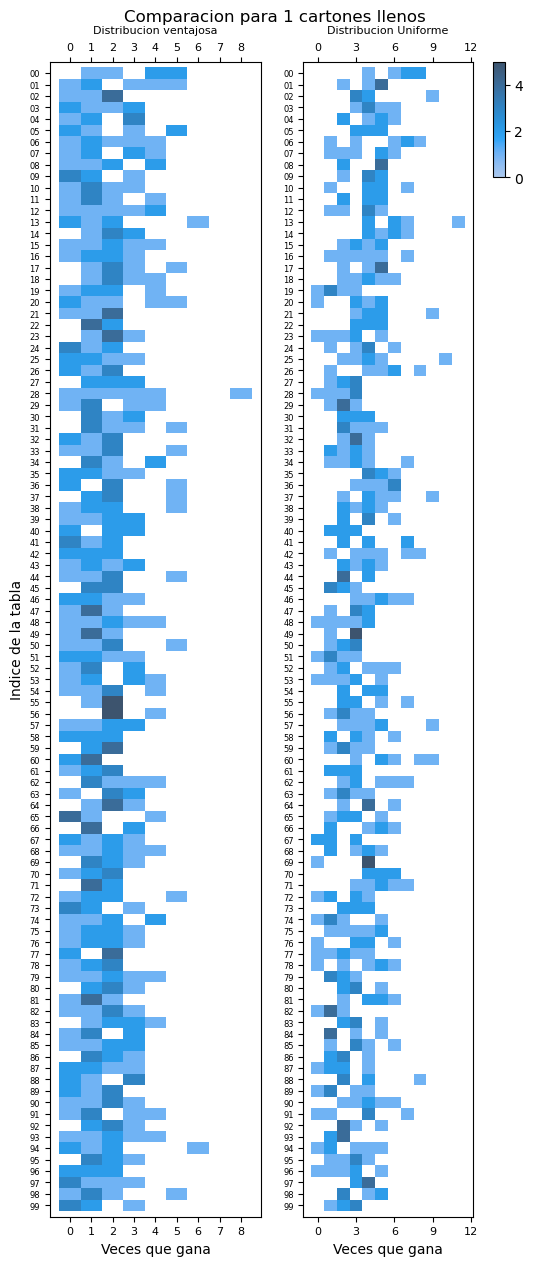

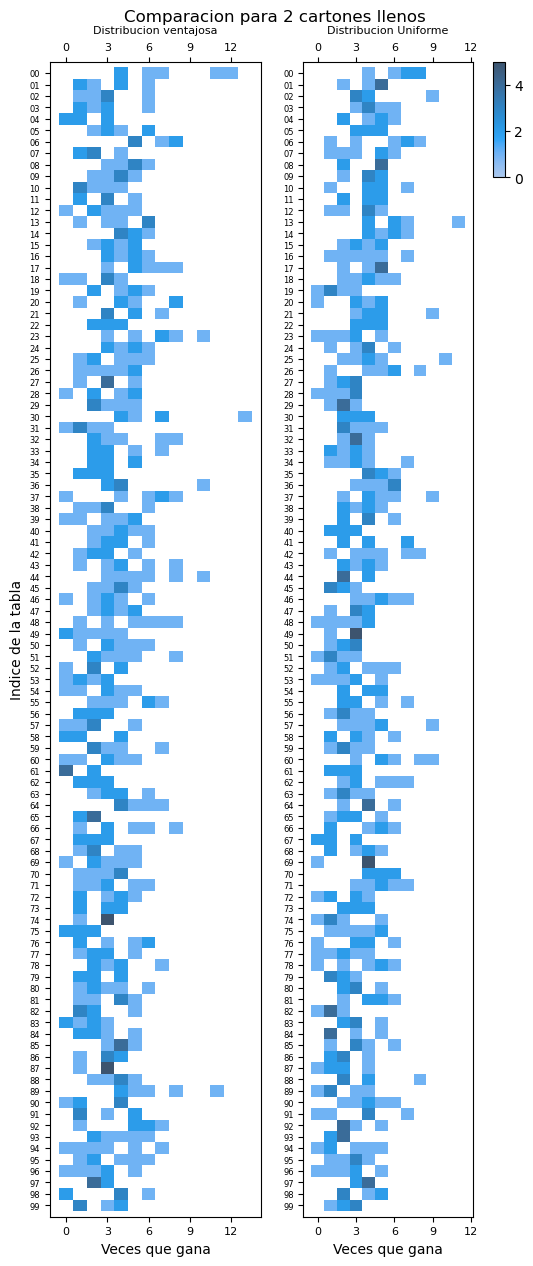

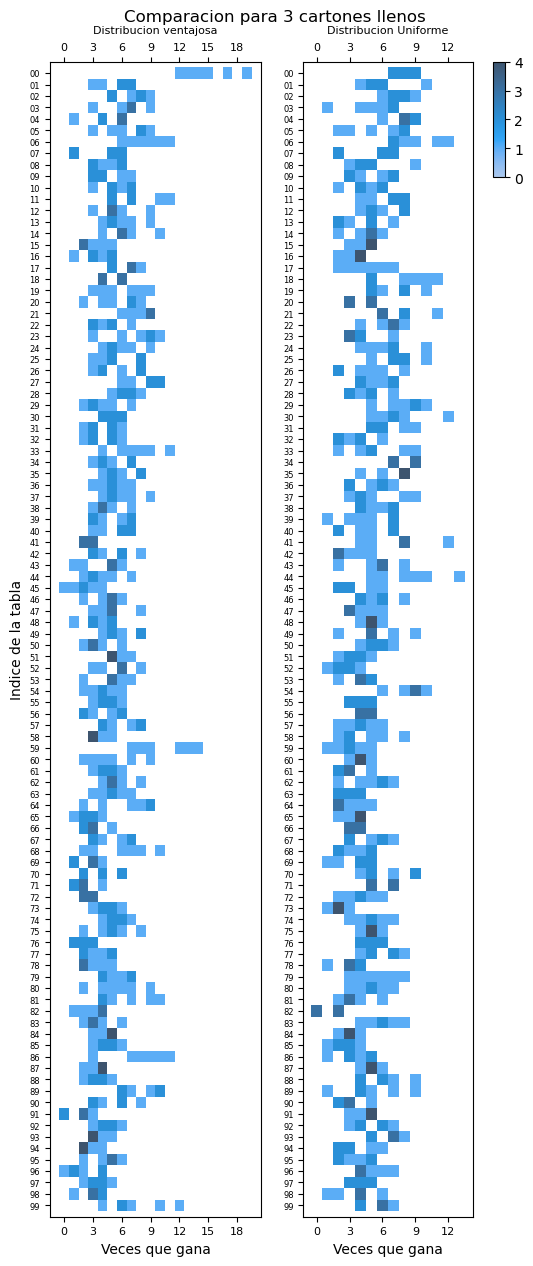

In [51]:
display(wt1,wt2,wt3)

In [148]:
def compare_count_wintab_ALL(cuenta,cuenta_NU,tabs):
    
    size = 14
    
    f, axs = plt.subplots(1,6,figsize=(24, 18))
    
    # 01
    sns.histplot(data=cuenta[0],x='conteo',y='tab',discrete=(1, 1),ax= axs[1]
                #,cbar=True, cbar_kws=dict(aspect=10,anchor=(0.50,1),shrink=.10)
                )  
    sns.histplot(data=cuenta_NU[0],x='conteo',y='tab',discrete=(1, 1),ax= axs[0]
                #,cbar=True, cbar_kws=dict(aspect=10,anchor=(0.50,1),shrink=.10)  
                )
    # 02
    sns.histplot(data=cuenta[1],x='conteo',y='tab',discrete=(1, 1),ax= axs[3]
                #,cbar=True, cbar_kws=dict(aspect=10,anchor=(0.50,1),shrink=.10)
                )  
    sns.histplot(data=cuenta_NU[1],x='conteo',y='tab',discrete=(1, 1),ax= axs[2]
                #,cbar=True, cbar_kws=dict(aspect=10,anchor=(0.50,1),shrink=.10)  
                ) 
     # 03
    sns.histplot(data=cuenta[2],x='conteo',y='tab',discrete=(1, 1),ax= axs[5]
                ,cbar=True, cbar_kws=dict(aspect=10,anchor=(0.50,1),shrink=.10)
                )  
    sns.histplot(data=cuenta_NU[2],x='conteo',y='tab',discrete=(1, 1),ax= axs[4]
                #,cbar=True, cbar_kws=dict(aspect=10,anchor=(0.50,1),shrink=.10)  
                )
    
    # 01             
    axs[0].xaxis.set_major_locator(MaxNLocator(steps=[3]))
    axs[0].tick_params(axis='x', labelsize=size-1)
    axs[0].tick_params(axis='y', labelsize=size-2)
    axs[0].set_ylim(100,-1)
    axs[0].set_xlabel("Veces que gana", fontsize = size)
    axs[0].set_ylabel("Indice de la tabla", fontsize = size)
    axs[0].set_title('Dist. No_uni (1 cart.)',fontsize = size-1)
    axs[0].tick_params(axis="x",bottom=True, top=True, labelbottom=True, labeltop=True)
    
    axs[1].xaxis.set_major_locator(MaxNLocator(steps=[3]))
    axs[1].tick_params(axis='x', labelsize=size-1)
    axs[1].tick_params(axis='y', labelsize=size-2)
    axs[1].set_ylim(100,-1)
    axs[1].set_xlabel("Veces que gana", fontsize = size)
    axs[1].set_ylabel(None)
    axs[1].set_title('Dist. Uniforme (1 cart.)',fontsize = size-1)
    axs[1].tick_params(axis="x",bottom=True, top=True, labelbottom=True, labeltop=True)
    axs[1].set_yticks([])
                 
    # 02             
    axs[2].xaxis.set_major_locator(MaxNLocator(steps=[3]))
    axs[2].tick_params(axis='x', labelsize=size-1)
    axs[2].tick_params(axis='y', labelsize=size-2)
    axs[2].set_ylim(100,-1)
    axs[2].set_xlabel("Veces que gana", fontsize = size)
    axs[2].set_ylabel(None)
    #axs[2].set_ylabel("Indice de la tabla", fontsize = size)
    axs[2].set_title('Dist. No_uni (2 cart.)',fontsize = size-1)
    axs[2].tick_params(axis="x",bottom=True, top=True, labelbottom=True, labeltop=True)
    axs[2].set_yticks([])
    
    axs[3].xaxis.set_major_locator(MaxNLocator(steps=[3]))
    axs[3].tick_params(axis='x', labelsize=size-1)
    axs[3].tick_params(axis='y', labelsize=size-2)
    axs[3].set_ylim(100,-1)
    axs[3].set_xlabel("Veces que gana", fontsize = size)
    axs[3].set_ylabel(None)
    axs[3].set_title('Dist. Uniforme (2 cart.)',fontsize = size-1)
    axs[3].tick_params(axis="x",bottom=True, top=True, labelbottom=True, labeltop=True)
    axs[3].set_yticks([])
 
    # 03             
    axs[4].xaxis.set_major_locator(MaxNLocator(steps=[3]))
    axs[4].tick_params(axis='x', labelsize=size-1)
    axs[4].tick_params(axis='y', labelsize=size-2)
    axs[4].set_ylim(100,-1)
    axs[4].set_xlabel("Veces que gana", fontsize = size)
    axs[4].set_ylabel(None)
    #axs[4].set_ylabel("Indice de la tabla", fontsize = size)
    axs[4].set_title('Dist. No_uni (3 cart.)',fontsize = size-1)
    axs[4].tick_params(axis="x",bottom=True, top=True, labelbottom=True, labeltop=True)
    axs[4].set_yticks([])
    
    axs[5].xaxis.set_major_locator(MaxNLocator(steps=[3]))
    axs[5].tick_params(axis='x', labelsize=size-1)
    axs[5].tick_params(axis='y', labelsize=size-2)
    axs[5].set_ylim(100,-1)
    axs[5].set_xlabel("Veces que gana", fontsize = size)
    axs[5].set_ylabel(None)
    axs[5].set_title('Dist. Uniforme (3 cart.)',fontsize = size-1)
    axs[5].tick_params(axis="x",bottom=True, top=True, labelbottom=True, labeltop=True)
    axs[5].set_yticks([])
                  
    

    f.suptitle(f"Comparacion para 1 ,2 y 3 cartones llenos",  y=1.0001,fontsize = size+5)
    plt.tight_layout()
    f.savefig("media/hist_comp_wintab_ALL_carts.png")
    
    return f

In [149]:
%%capture
figall=compare_count_wintab_ALL([cuenta1,cuenta2,cuenta3],[cuenta1_NU,cuenta2_NU,cuenta3_NU],1)

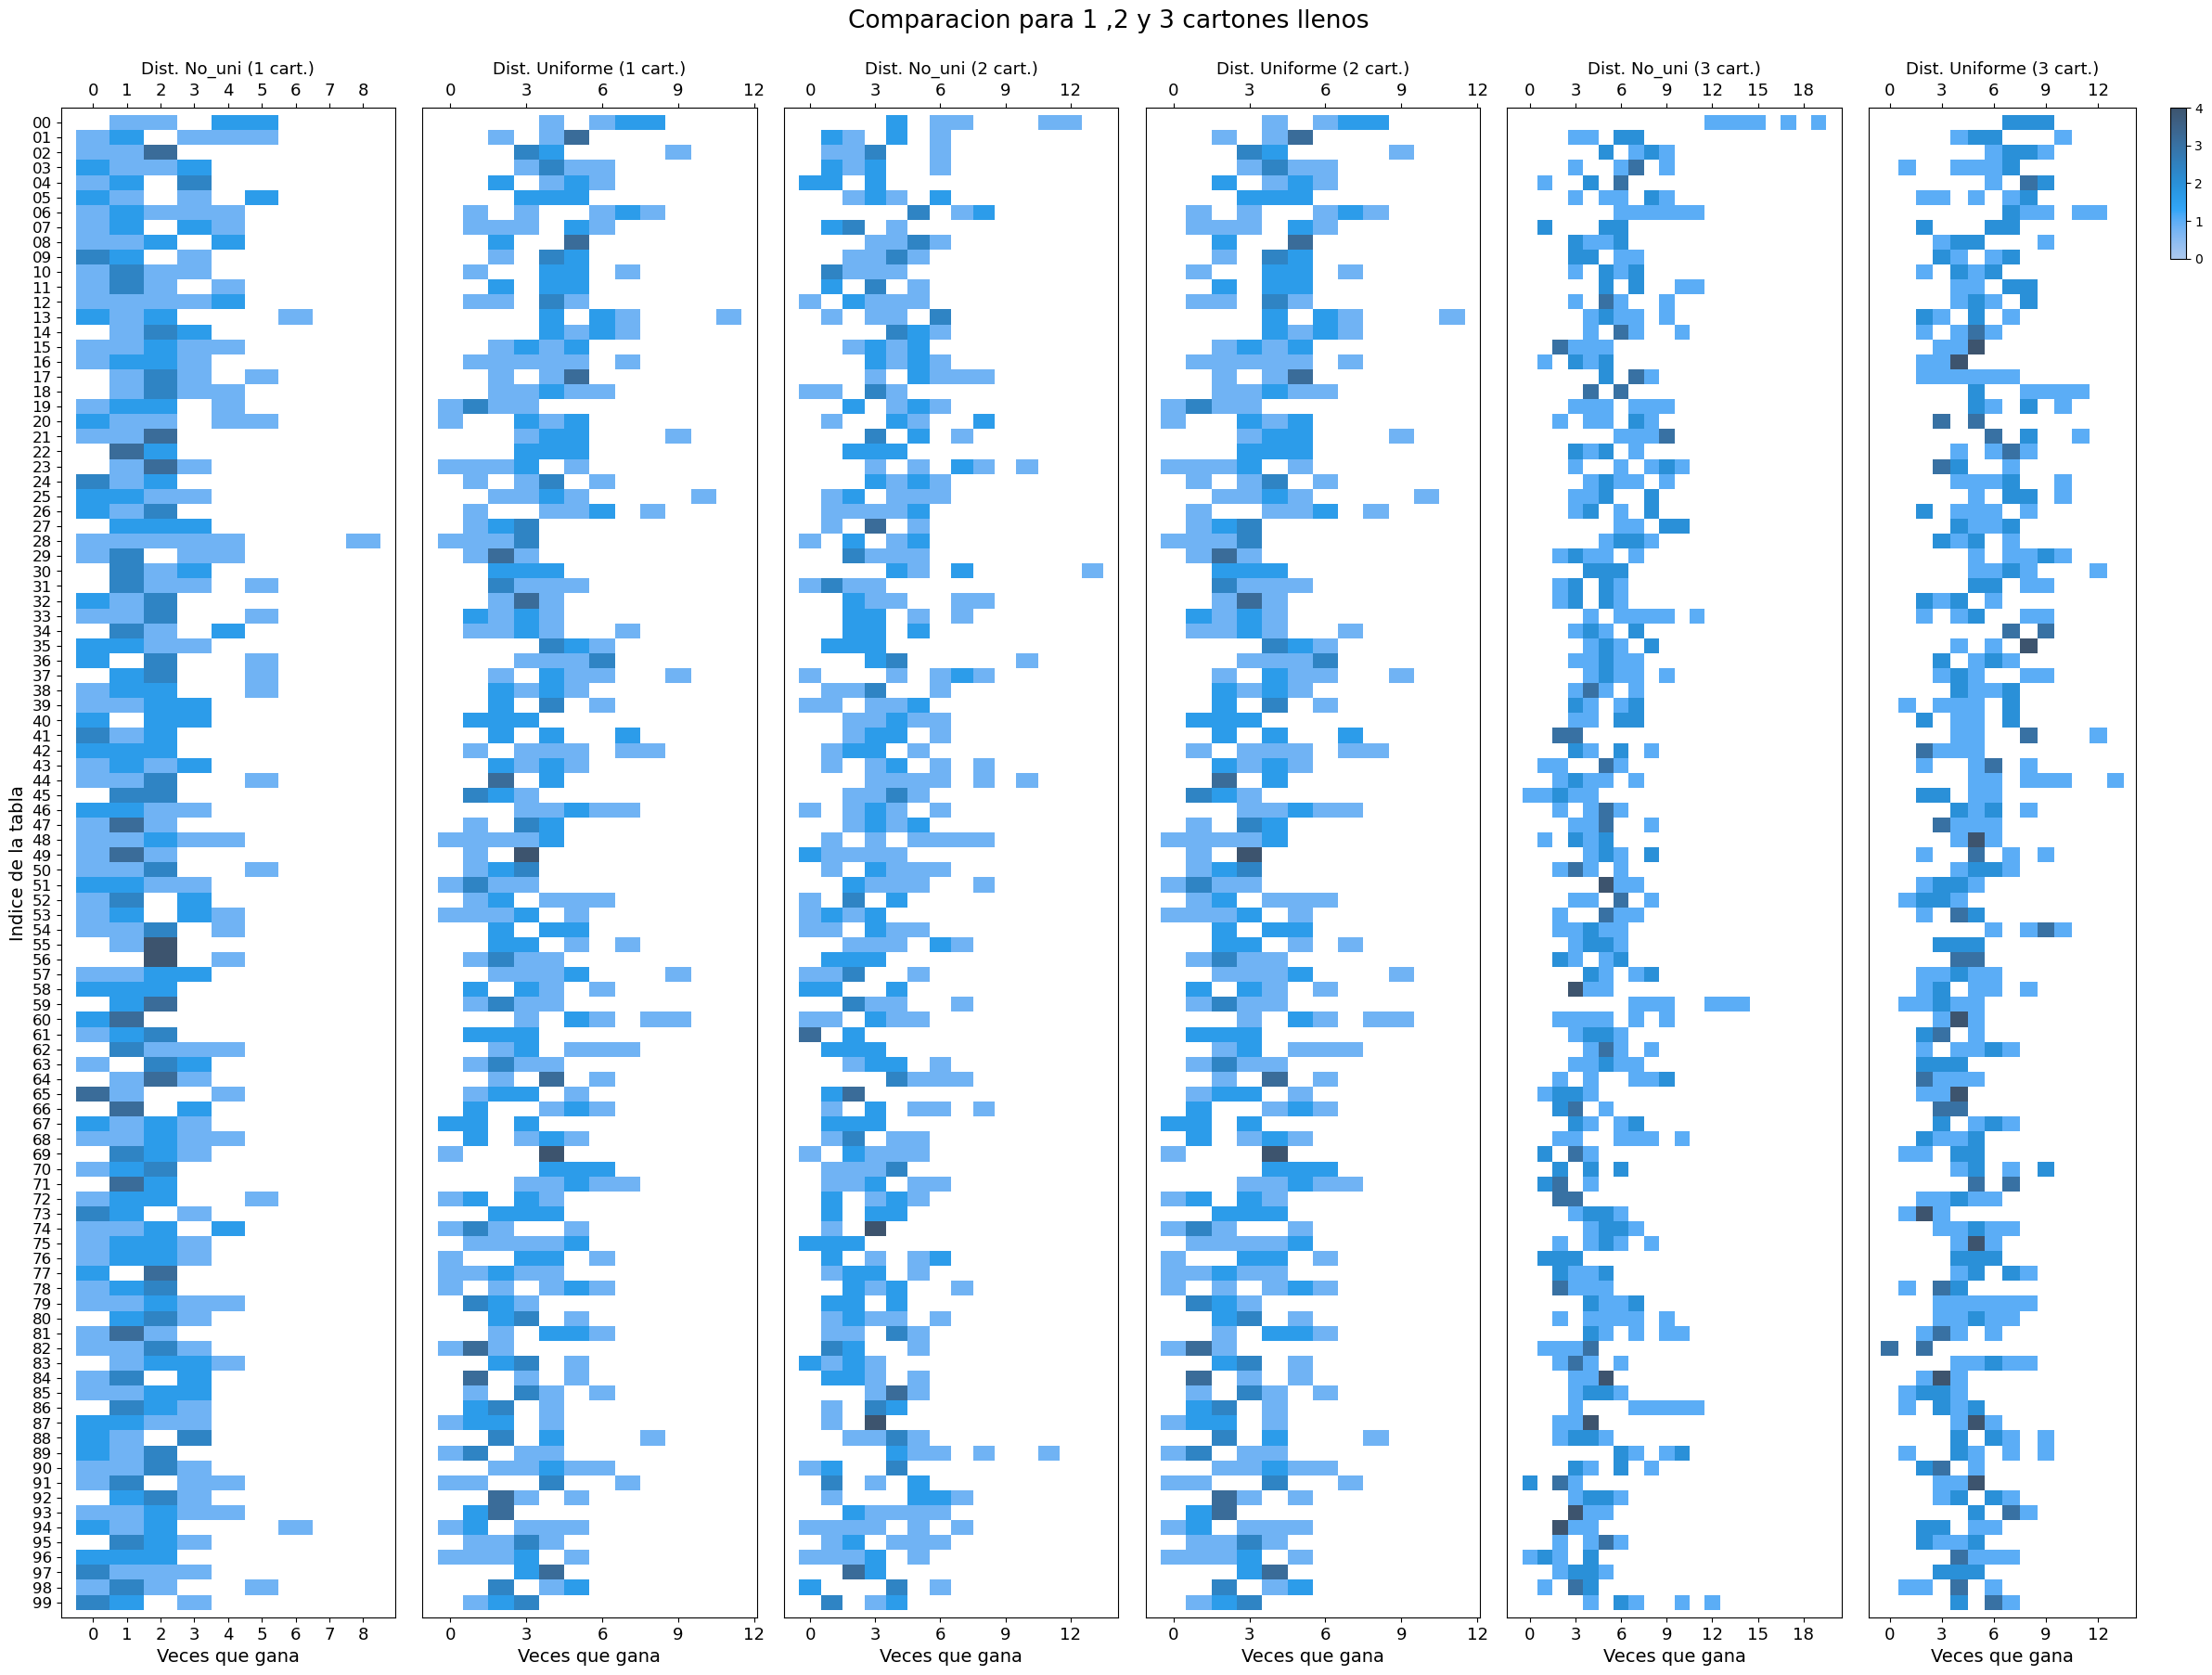

In [150]:
display(figall)

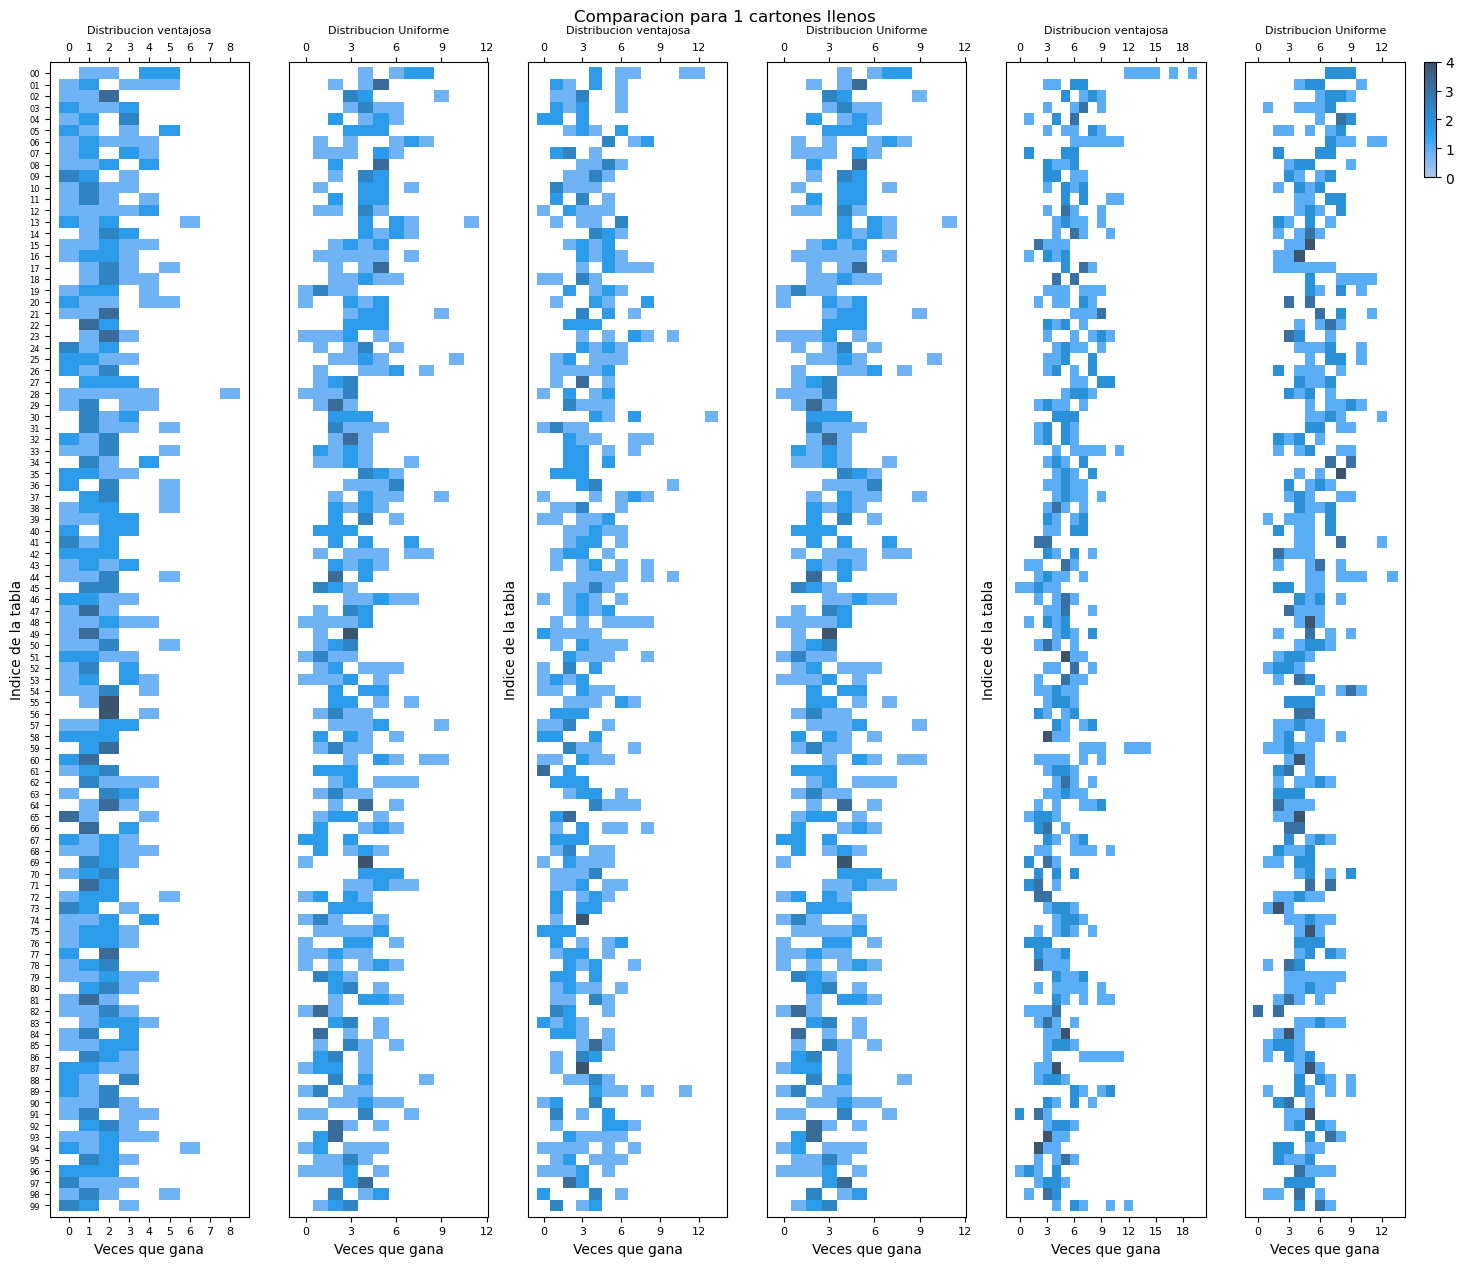

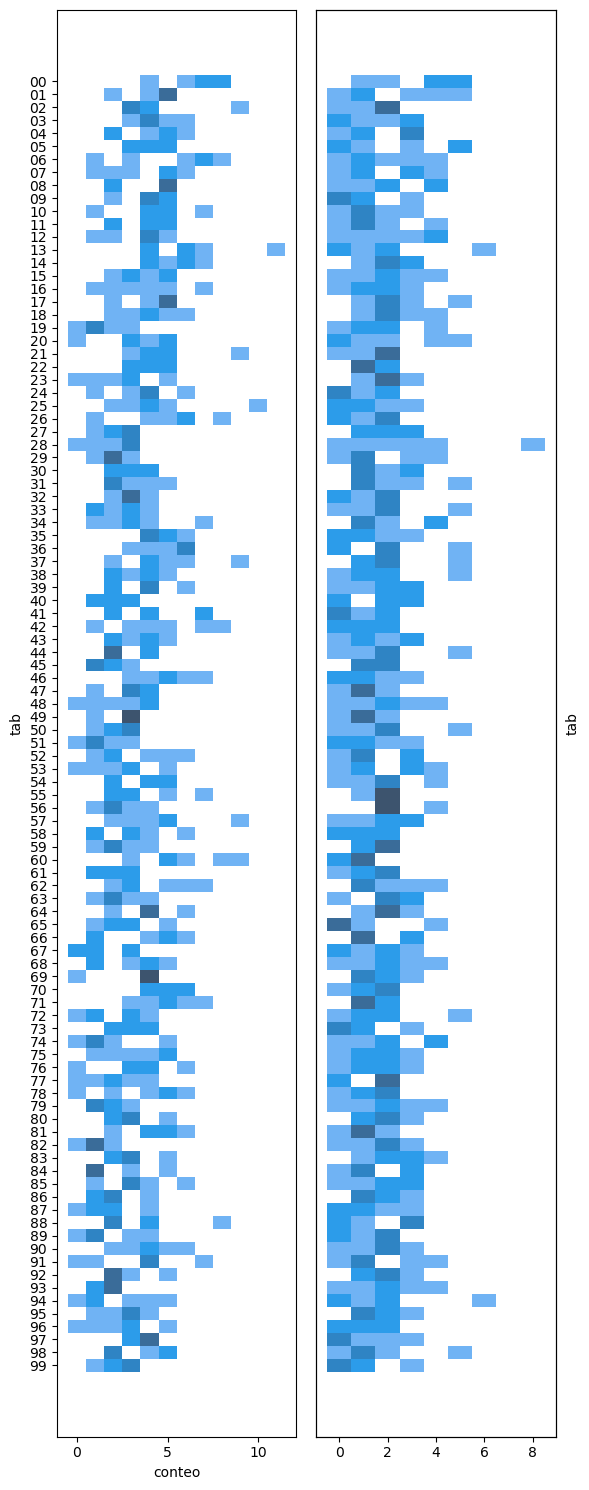

In [92]:

size = 10
f, axs = plt.subplots(1,2,figsize=(6, 15))

sns.histplot(data=cuenta1,x='conteo',y='tab',discrete=(1, 1), ax=axs[0])  
sns.histplot(data=cuenta1_NU,x='conteo',y='tab',discrete=(1, 1),
             ax=axs[1].twinx())

plt.gca().set_yticks([]) # elimina los ticks en ambos lados del eje y del subplot activo
axs[1].set_ylabel(None)
axs[1].set_yticks([])

plt.tight_layout()


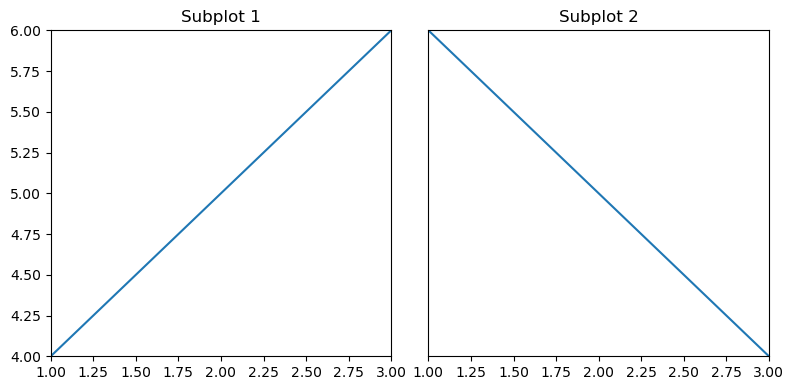

In [91]:
import matplotlib.pyplot as plt

# Crear una figura con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Eliminar los márgenes de los subplots
for ax in axs:
    ax.margins(0)

# Graficar en el primer subplot
axs[0].plot([1, 2, 3], [4, 5, 6])
axs[0].set_title('Subplot 1')

# Graficar en el segundo subplot
axs[1].plot([1, 2, 3], [6, 5, 4])
axs[1].set_title('Subplot 2')
axs[1].set_yticks([])

# Ajustar los subplots para que no se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Es aleatorio la seleccion de fichas de la bolsa?

Por la forma del sistema físico de selección de fichas, podemos estar casi seguro que hay una probabilidad desbalanceada entre todas las fichas. por tal motivo se simulo dos tipos de distribucion, sin embargo podremos saber ¿que tan aleatoria es lista de fichas cantadas en cada sorteo? ¿ Podremos usar la informacion anterior como base para saber con señales evidentes que no se trata de un sorteo justo?




In [153]:
df_fichas2 = pd.read_csv("temp/fichas/loteria-17-02-23.csv",header=None,names= ['A1','A2','A3','A4','A5','A6','A7','A8'])
df_fichas1 = pd.read_csv("temp/fichas/loteria-28-01-23.csv",header=None,names= ['B1','B2','B3','B4','B5','B6','B7','B8'])
df_fichas1['B1'].T

0        poceta
1       cebolla
2       patilla
3     tamarindo
4        llaves
        ...    
88          NaN
89          NaN
90          NaN
91          NaN
92          NaN
Name: B1, Length: 93, dtype: object

In [154]:
df_fichas2 = pd.read_csv("temp/fichas/loteria-17-02-23.csv",header=None)
df_fichas1 = pd.read_csv("temp/fichas/loteria-28-01-23.csv",header=None)


In [37]:
a2 ,b2= np.unique( df_fichas2.dropna(),return_counts=True)
a1 ,b1= np.unique( df_fichas1.dropna(),return_counts=True)
len(a1.T),len(a2.T)


(118, 129)

# Comrprobar la aleatoridad de las fichas

Si solo estás interesado en analizar la lista de números cantados durante un juego de bingo, puedes usar una prueba estadística más simple llamada prueba de corridas.

Así es cómo podrías aplicar la prueba de corridas en este contexto:

Cuenta el número de corridas en la lista de números cantados durante el juego. Una corrida se define como una secuencia de números consecutivos que se cantan sin repeticiones ni huecos. Por ejemplo, si se cantan los números 10, 11, 12 y 14 en ese orden, habría dos corridas (10-12 y 14).

Calcula el número esperado de corridas (NEC) si los números se hubieran elegido al azar utilizando la fórmula:

$$ NEC = \frac{(2 . n_1 . n_2)}{(n_1 + n_2) + 1}$$

donde n1 y n2 son el número de números impares y pares en la lista, respectivamente.

Calcula la estadística de prueba utilizando la fórmula:

$$EP = \frac{n_{c} - n_{ec}}{std_{c}}$$

donde EP seria la estadística de prueba, $n_c$ el número de corridas, $n_{ec}$ y ${std_c}$ es ladesviación estándar de las corridas

La desviación estándar de las corridas (stdC) se puede calcular como:

$$stdC = \sqrt{\frac{2n_1n_2\left(2n_1 n_2 - n_1 - n_2\right)}{\left(n_1 + n_2\right)^2 \left(n_1 + n_2 - 1\right)}}$$

Compara la estadística de prueba con el valor crítico para el nivel de significancia apropiado (generalmente 0,05). Si la estadística de prueba es mayor que el valor crítico, puedes rechazar la hipótesis nula de aleatoriedad y concluir que los números fueron manipulados. Si la estadística de prueba es menor que el valor crítico, no puedes rechazar la hipótesis nula y puedes concluir que los números se eligieron al azar.
Nuevamente, es importante tener en cuenta que hay otros factores que pueden afectar los resultados de un juego de bingo, por lo que la prueba de corridas es solo una herramienta que se puede usar para evaluar la aleatoriedad en la lista de números cantados durante el juego.

Espero que esto te ayude.

Si estás interesado en analizar si la lista de números cantados durante un juego de bingo es aleatoria o manipulada, puedes usar una prueba estadística llamada prueba de chi-cuadrado.

Así es cómo podrías aplicar la prueba de chi-cuadrado en este contexto:

Crea una tabla de contingencia que muestre las frecuencias observadas de cada número cantado durante el juego, así como las frecuencias esperadas si los números se hubieran elegido al azar.

Calcula la estadística de chi-cuadrado ($\chi^2$) utilizando la fórmula:

$$\chi^2 = \sum \frac{(f_o - f_e)^2}{f_e}$$

donde $f_o$ es la frecuencia observado y $f_e$ Es la frecuencia esperada. Determina los grados de libertad para la prueba, que es igual al número de categorías (en este caso, el número de números de bingo diferentes) menos 1.


Busca el valor crítico de chi-cuadrado para los grados de libertad apropiados y el nivel

In [160]:
#import numpy as np
from scipy.stats import chisquare

In [161]:
AB = df_fichas1.merge(df_fichas2.dropna(),how='outer', left_index=True, right_index=True)

In [162]:
uniqueAB,countAB=np.unique(AB.dropna(),return_counts=True)

In [163]:
len(uniqueAB),uniqueAB

(146,
 array(['acha', 'aguacate', 'aguila', 'ajo', 'alacran', 'araña', 'arbol',
        'ardilla', 'auyama', 'avion', 'ballena', 'bandera', 'barco',
        'berenjena', 'bicicleta', 'bota', 'buho', 'caballo', 'cacao',
        'cachicamo', 'caco', 'caiman', 'caiman ', 'cambur', 'cambures',
        'camello', 'caracol', 'casa', 'castaña', 'catuche', 'cebolla',
        'cebra', 'cereza', 'cerrucho', 'chirero', 'chirimolla',
        'chirimoya', 'chivo', 'choro', 'cienpies', 'cochino', 'coco',
        'coliflor', 'computadora', 'conejo', 'culebra', 'dados', 'delfin',
        'durazno', 'elefante', 'escalera', 'fresa', 'gallo', 'garza',
        'globo', 'gorra', 'granada', 'guayaba', 'higo', 'hongo', 'icaco',
        'iguana', 'jeringa', 'jirafa', 'jojoto', 'lampara', 'lapiz',
        'lavadora', 'lechoza', 'lentes', 'leon', 'libros', 'limones',
        'llaves', 'loro', 'maestra', 'mamon', 'mango', 'manzana',
        'maracas', 'melon', 'merey', 'mono', 'moto', 'muñeca', 'naranja',
      

In [164]:
countAB.sum()

400

In [165]:
frq_esp = len(AB)/159
frq_esp

0.5849056603773585

In [166]:
idx_unique = np.arange(1,159)
frq_esp

0.5849056603773585

In [167]:
frq_obs = AB.stack().value_counts()
frq_obs1 = df_fichas1.stack().value_counts()
frq_obs2 = df_fichas2.stack().value_counts()

Text(0.5, 0, 'Veces cantadas')

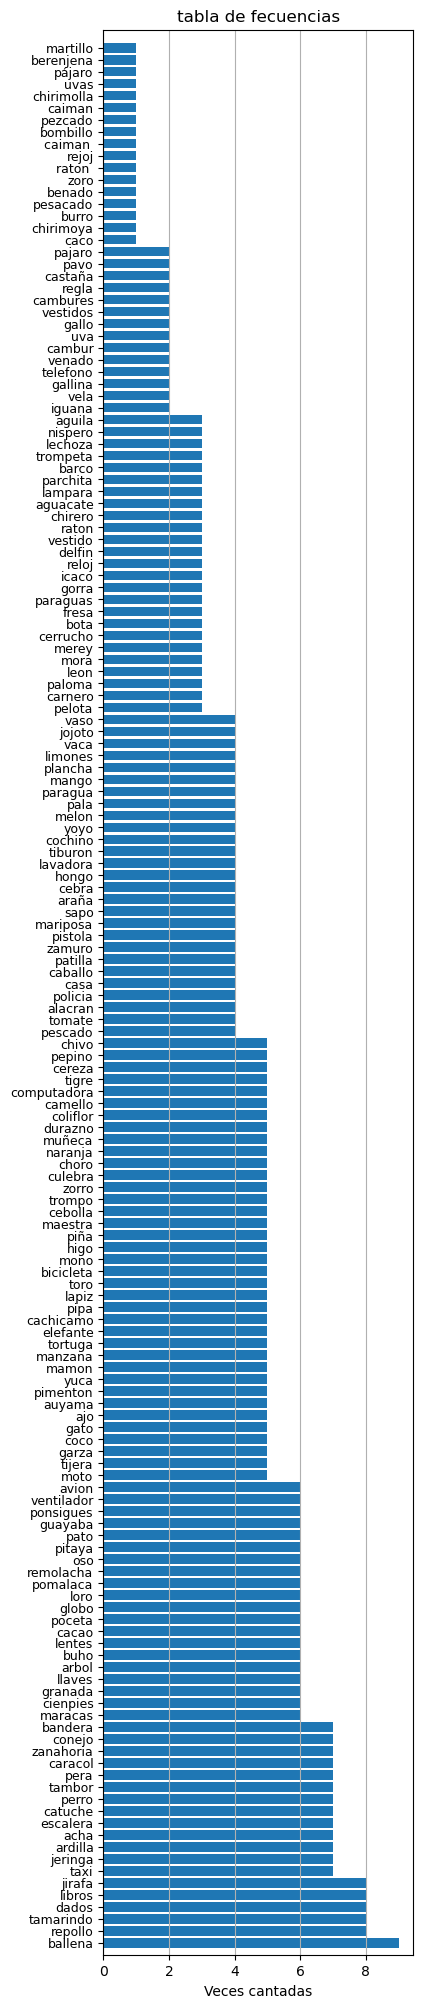

In [168]:
f,axs =  plt.subplots(figsize=(4, 25))
plt.barh(frq_obs.index,frq_obs)
plt.ylim(-1,159.5)
plt.yticks(fontsize = 9)
plt.grid(axis='x')
plt.title('tabla de fecuencias')
plt.xlabel('Veces cantadas')

In [20]:
frq_obs

ballena       9
repollo       8
tamarindo     8
dados         8
libros        8
             ..
chirimolla    1
uvas          1
pájaro        1
berenjena     1
martillo      1
Length: 159, dtype: int64

In [172]:
def grafica_frecuencias(frq_obs,sorteo):
    # Obtener el rango de valores de frecuencia
    max_frq = max(frq_obs)
    min_frq = min(frq_obs)
    frq_range = max_frq - min_frq

    # Calcular el valor de desplazamiento de color para cada barra
    color_shifts = [(frq - min_frq) / frq_range for frq in frq_obs]

    # Crear el gráfico de barras horizontal con el corrimiento de color
    f, axs = plt.subplots(figsize=(3, 23))
    bars = axs.barh(frq_obs.index, frq_obs, color=plt.cm.turbo(np.array(color_shifts)))
    axs.set_ylim(-1, 159.5)
    axs.set_yticks(frq_obs.index)
    axs.tick_params(axis='y', labelsize=9)
    axs.grid(axis='x')
    axs.set_title('Tabla de frecuencias del sorteo :'+sorteo)
    axs.set_xlabel('Veces cantadas')

       
    # Mostrar el gráfico
    plt.tight_layout()
    f.savefig("media/tabla_de_ferecuencia_sorteo-"+sorteo+".png")
    
    return f


In [173]:
%%capture
fall = grafica_frecuencias(frq_obs,'1_y_2')
f1 = grafica_frecuencias(frq_obs1,'1')
f2 = grafica_frecuencias(frq_obs2,'2')

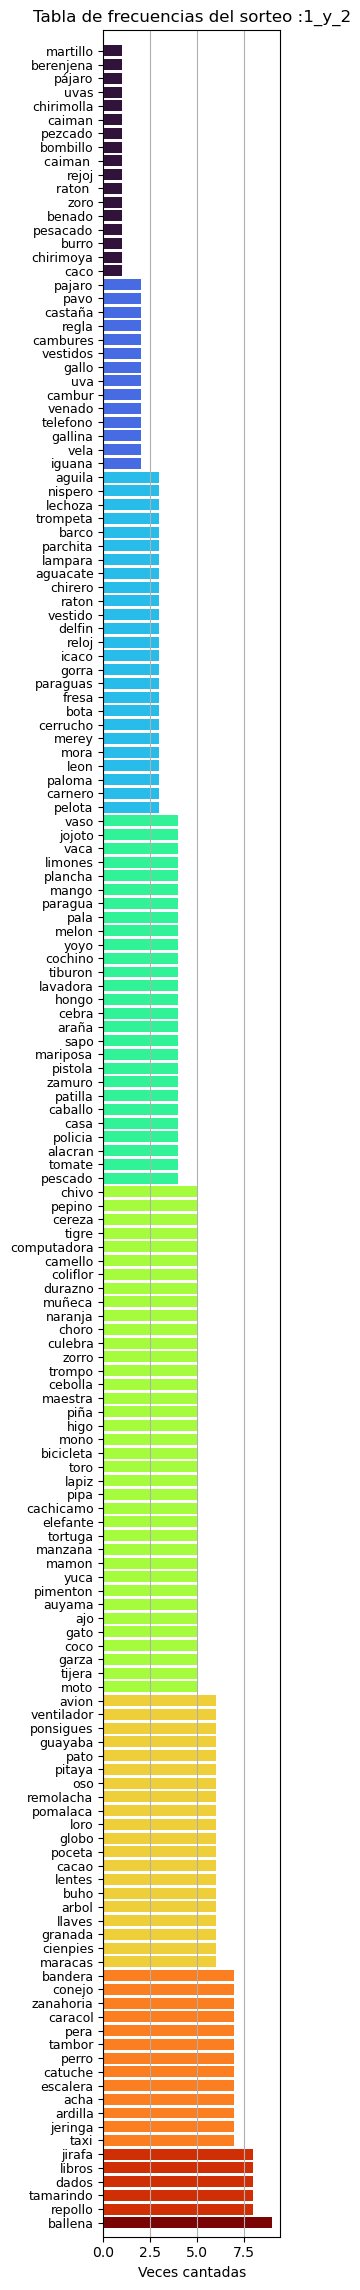

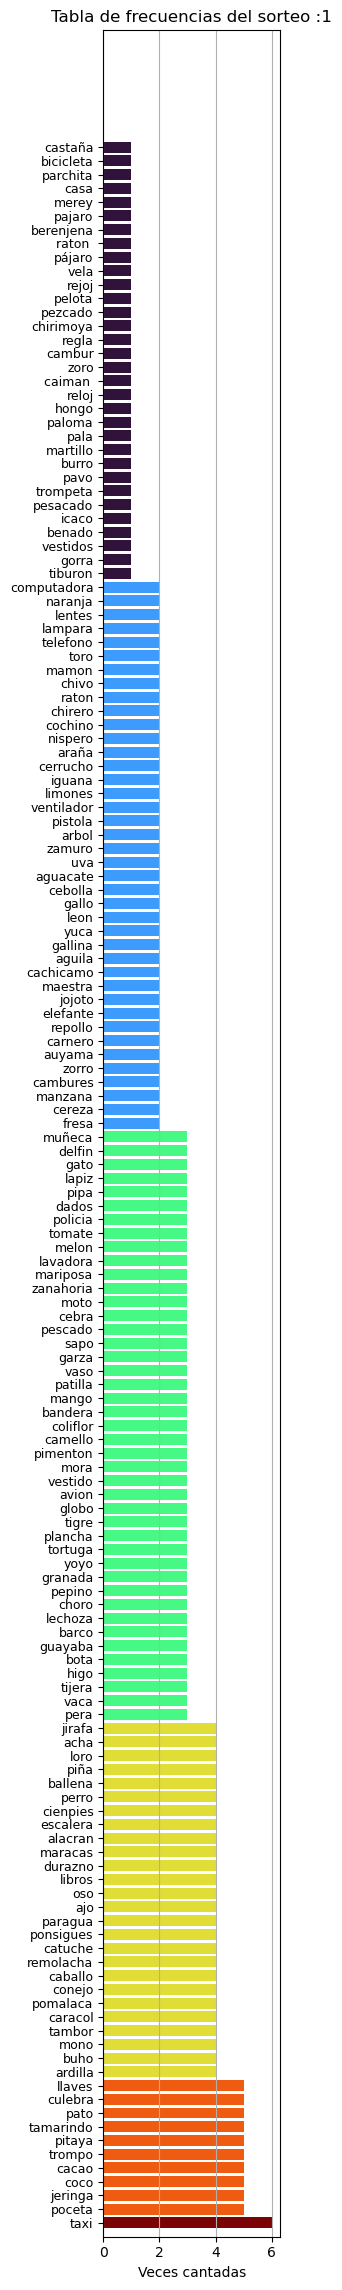

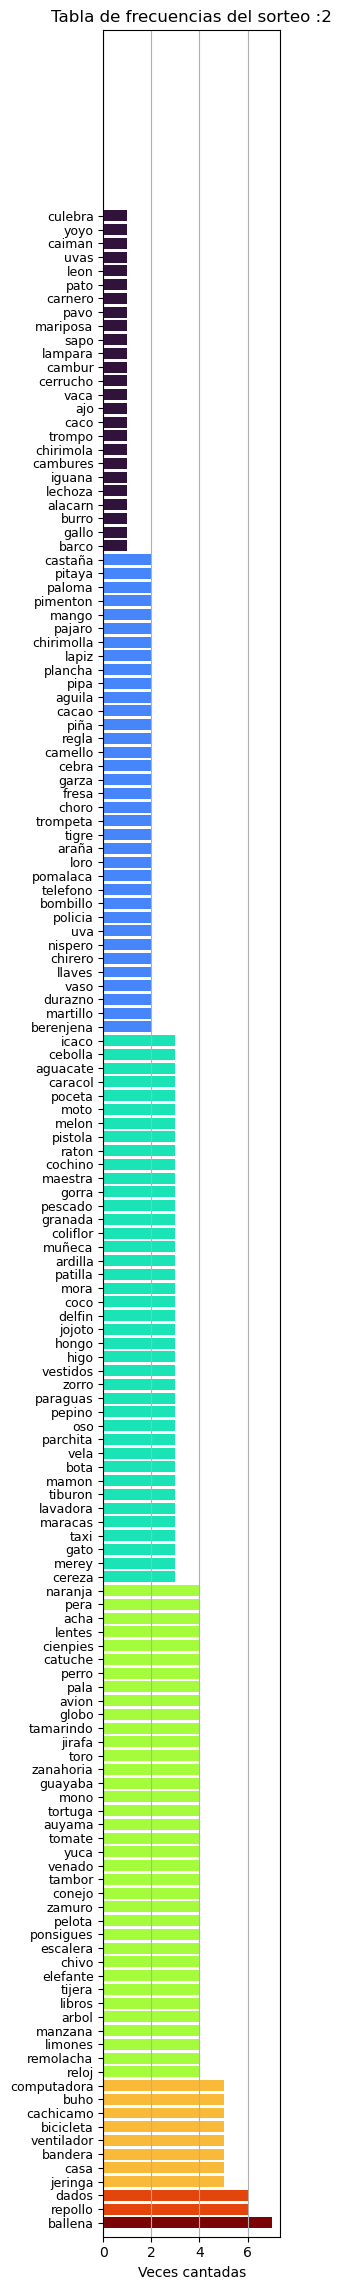

In [174]:
display(fall,f1,f2)

# Economia

Un bingo se puede desarrollar a modo de negocio, en donde se desarrolla un espectaculo y una cantidad de actividades afines. vamos a proponer unas cuentas, consideremos una loteria que hace 8 sorteos, donde el primer sorteo son 1200\$, luego 5 sorteos de 300\$ sumando unos 1500\$ mas, luego un sorteo de 800\$ en articulos varios y por ultimo un gran especial de 6000\$, esto nos da un rsultado de 9500\$ en total. Si cada tabla tiene un costo de 2\$ como minimo se deberian vender 4750 tablas, Si anexamos gastos en logistica, entretenmineto, seguridad, sonido, podriamos estimar que como minimo se deberian vender de 6000 tablas. 
